In [1]:
import numpy as np
from debug_utils import construct_experiment_df
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

from debug_utils import summary, summary_labels, summary_cumulative_plot

In [2]:
categories = {
    'mug': [2, 8, 14],
    'bottle': [3, 12, 19],
    'box':[14, 17],
    'bowl':[1, 16],
    'cylinder': [2, 11],
    'pan': [3,6],
    'scissor': [4,7],
    'fork': [1, 11],
    'hammer': [15],
    'spatula': [1, 14]
}

num_unique_objects = np.sum([len(categories[a]) for a in categories.keys()])
sampler = "graspnet"

prefixes = [
    f"gpd_SE_GraspFlow_Theta",
    f"gpd_S_GraspFlow_Theta",
    f"gpd_S_GraspFlow_Euler",
    f"gpd_S_GraspFlow_SO3",
    f"gpd_S_graspnet_Euler",
    f"gpd_S_metropolis_Euler",
    
    f"graspnet_SE_GraspFlow_Theta",
    f"graspnet_S_GraspFlow_Theta",
    f"graspnet_S_GraspFlow_Euler",
    f"graspnet_S_GraspFlow_SO3",
    f"graspnet_S_graspnet_Euler",
    f"graspnet_S_metropolis_Euler",
]


samplers = [
    "gpd",
    "gpd",
    "gpd",
    "gpd",
    "gpd",
    "gpd",
    "graspnet",
    "graspnet",
    "graspnet",
    "graspnet",
    "graspnet",
    "graspnet",
]
experiments_dir='../experiments'
experiment=28
full=False

save_dir = f'{experiments_dir}/generated_grasps_experiment{experiment}/results'
Path(save_dir).mkdir(parents=True, exist_ok=True)

(420,) (420,)


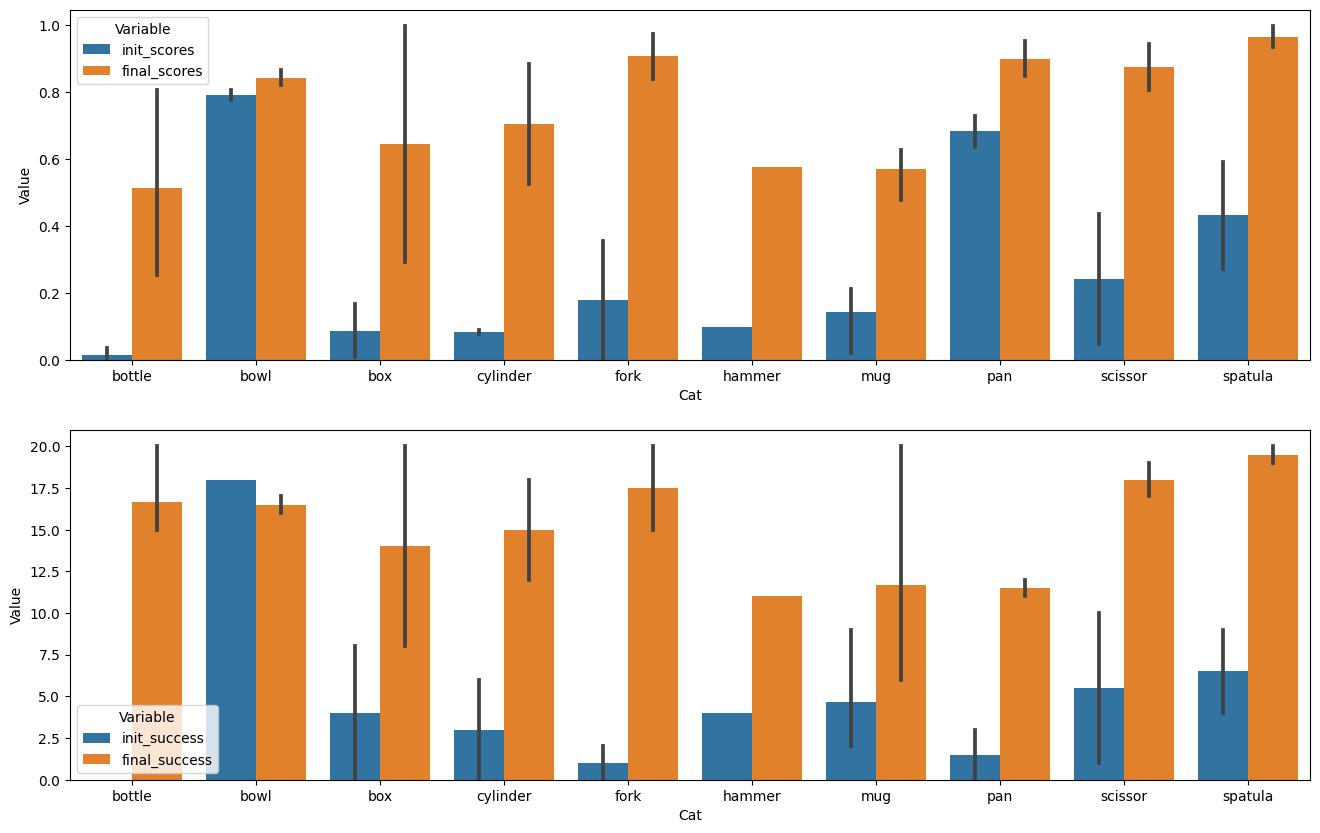

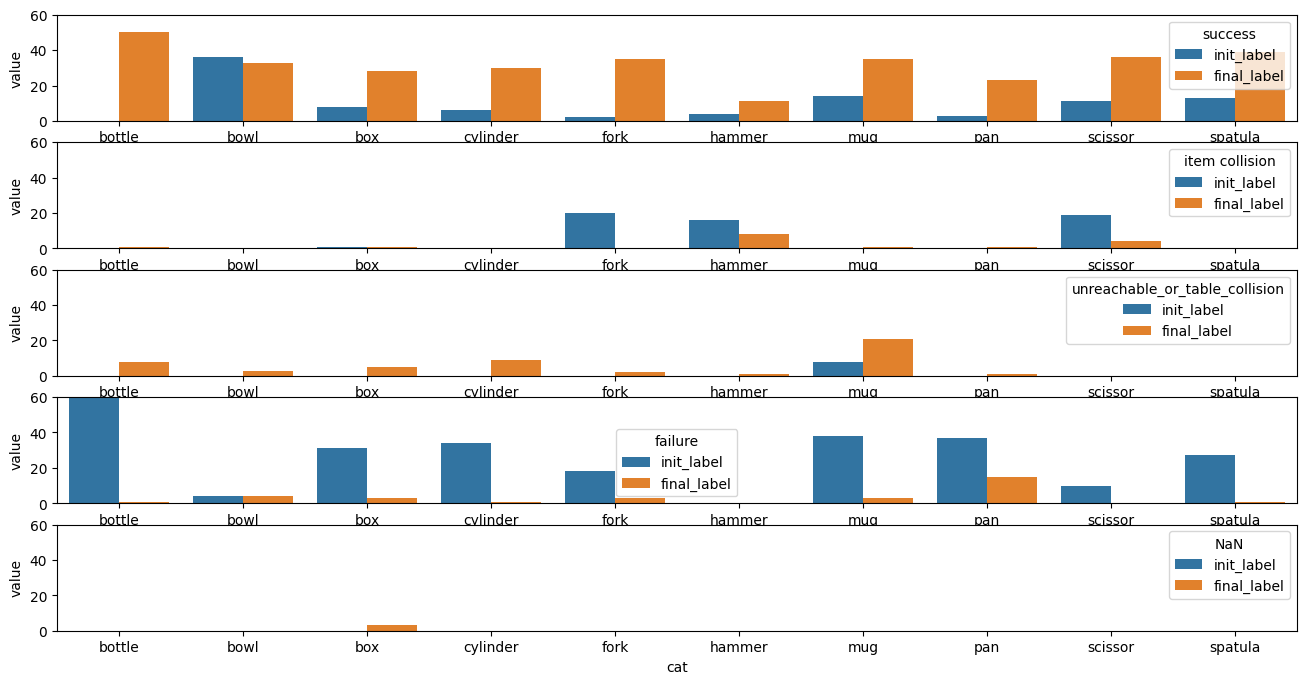

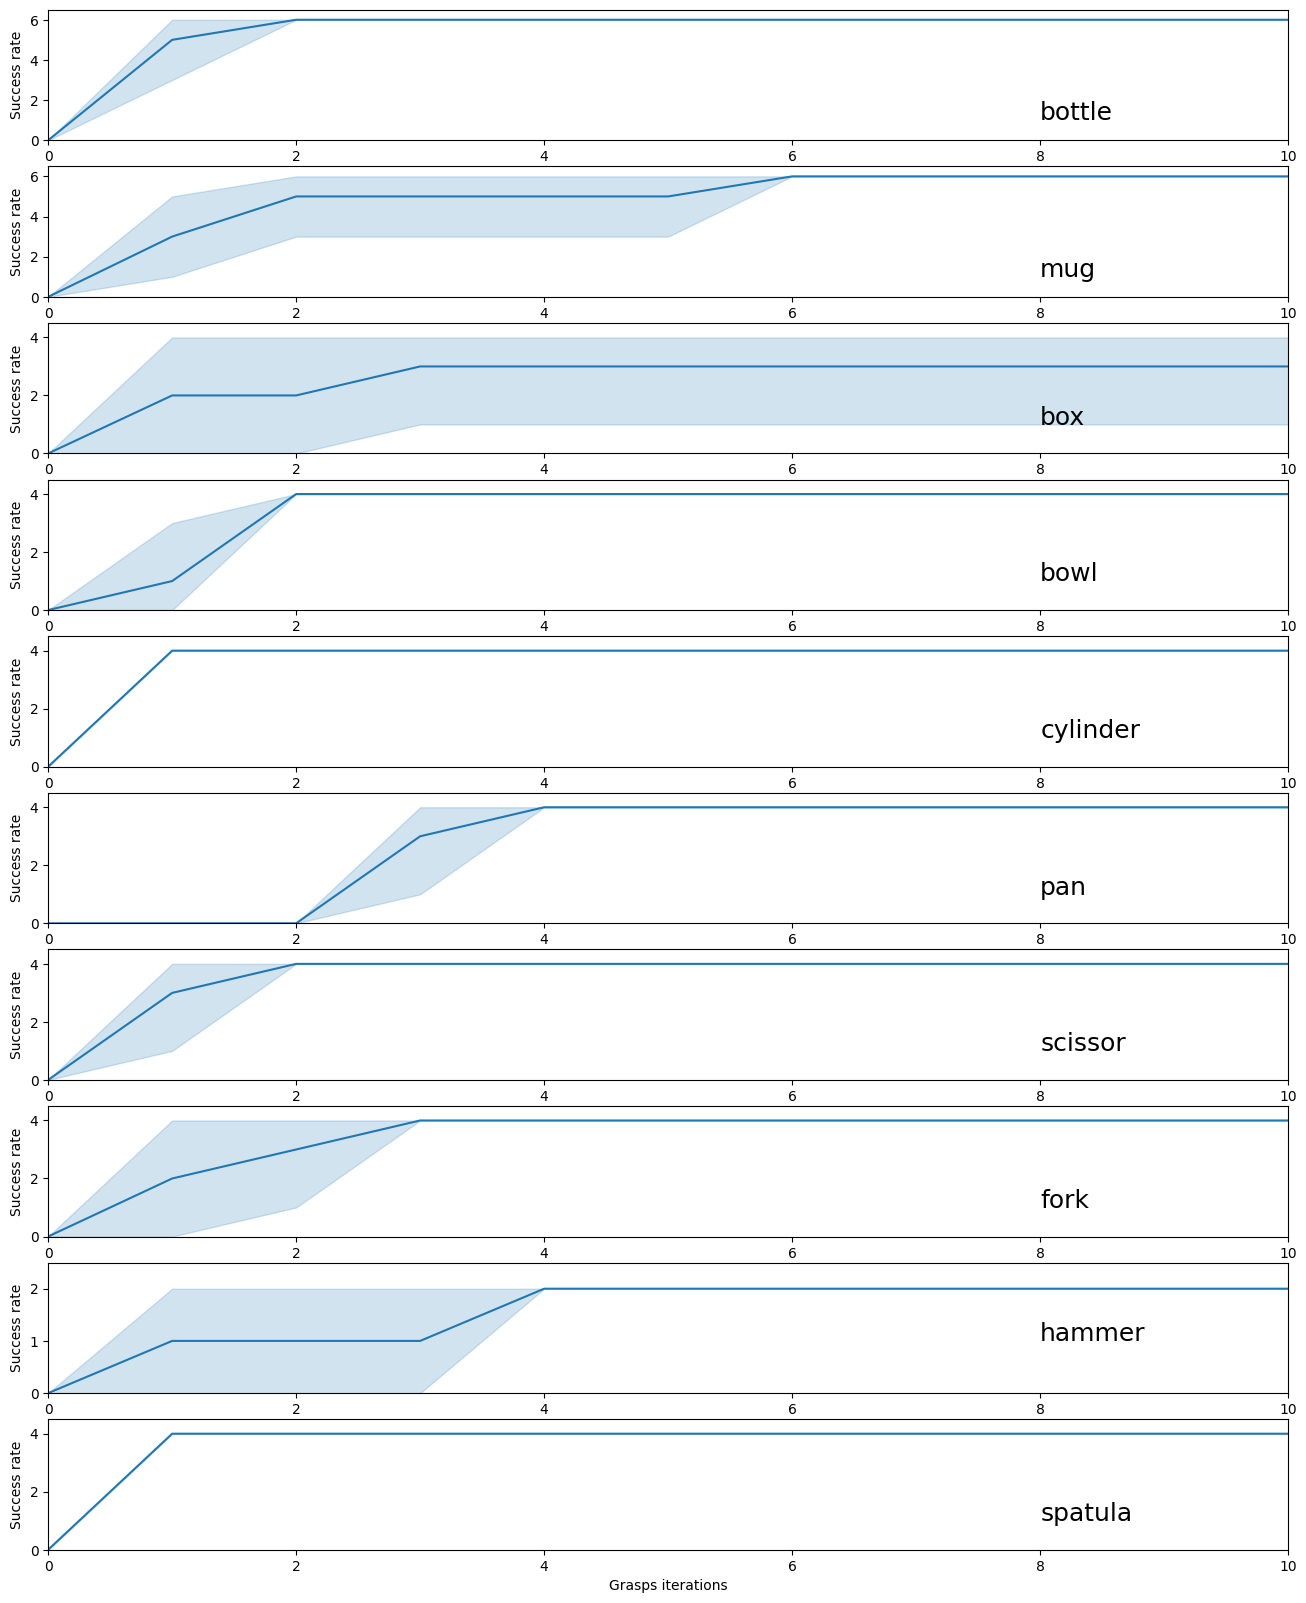

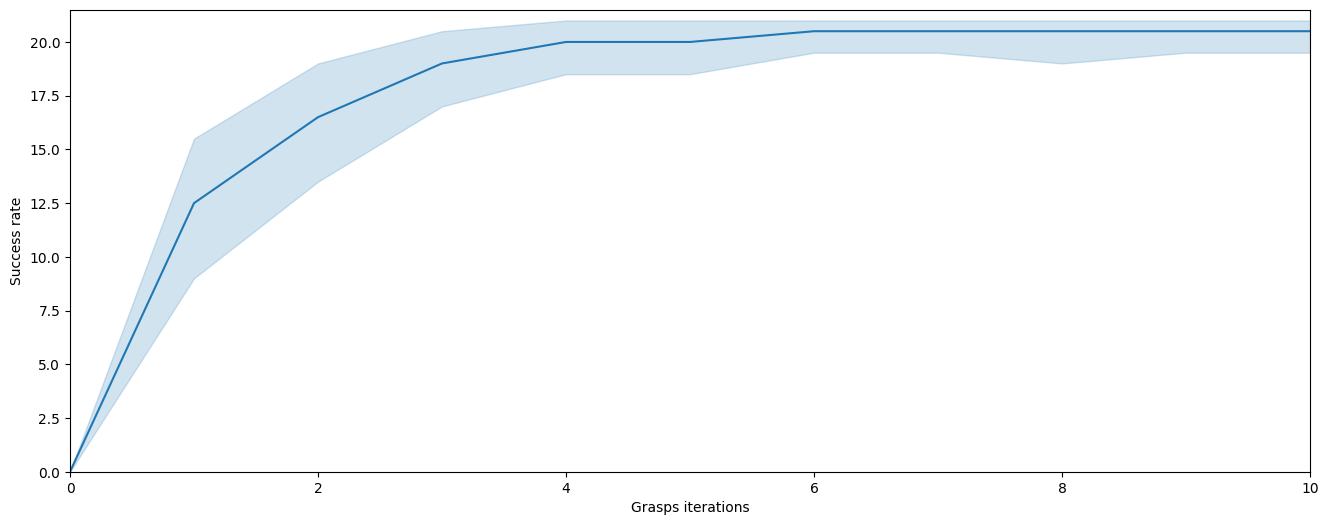

(420,) (420,)


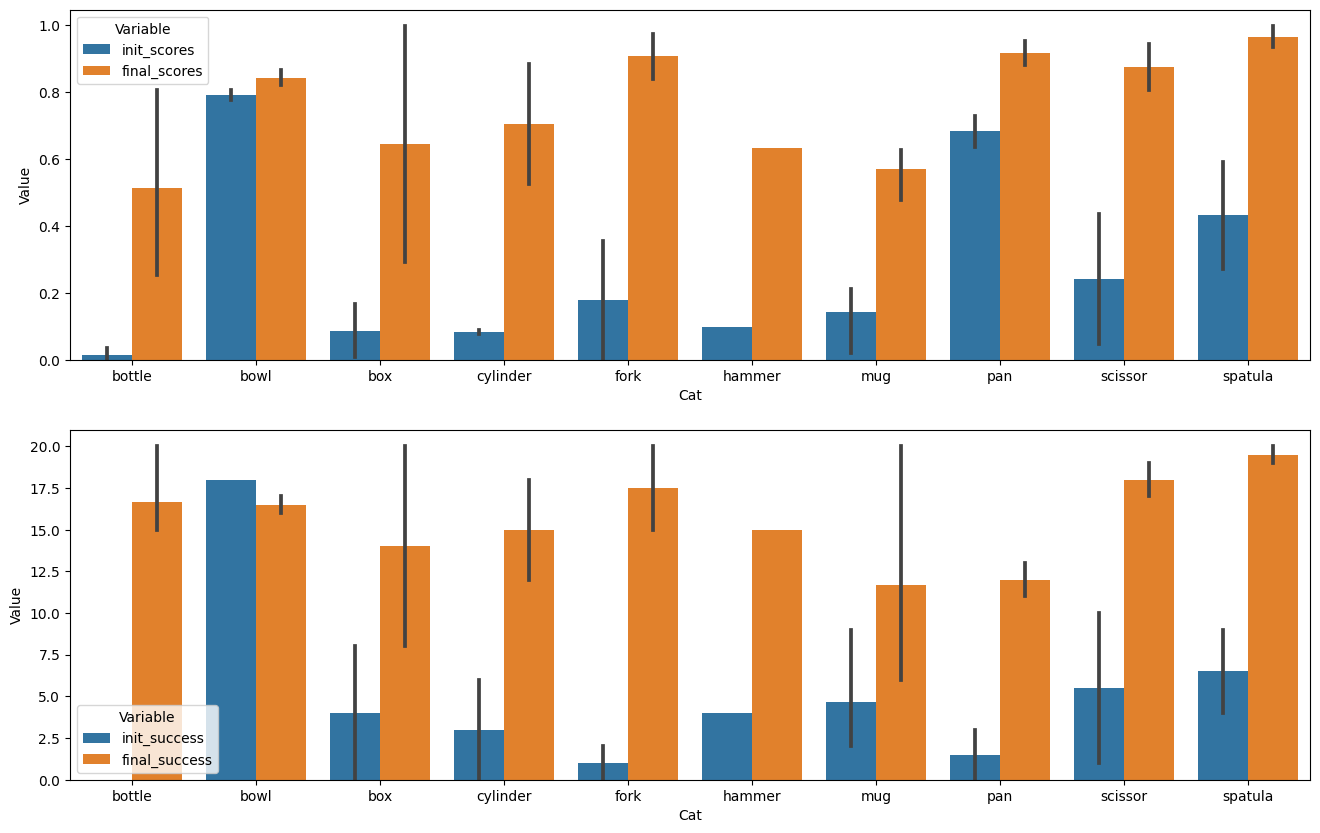

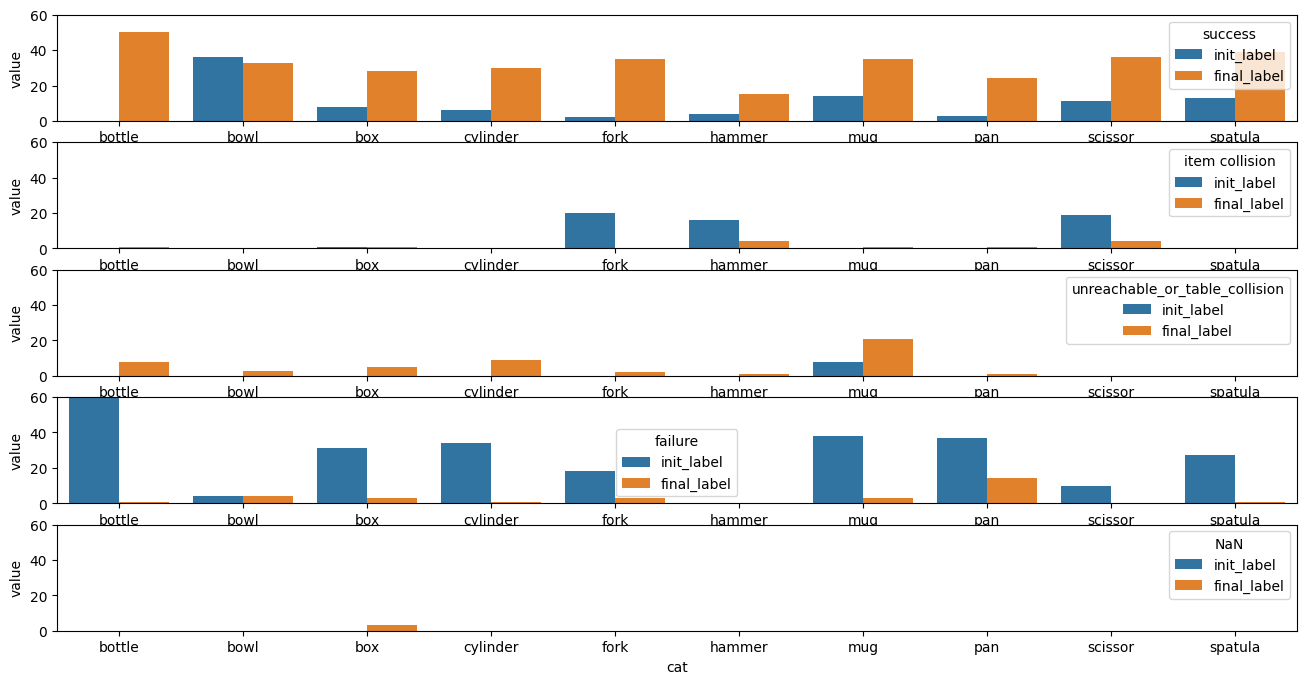

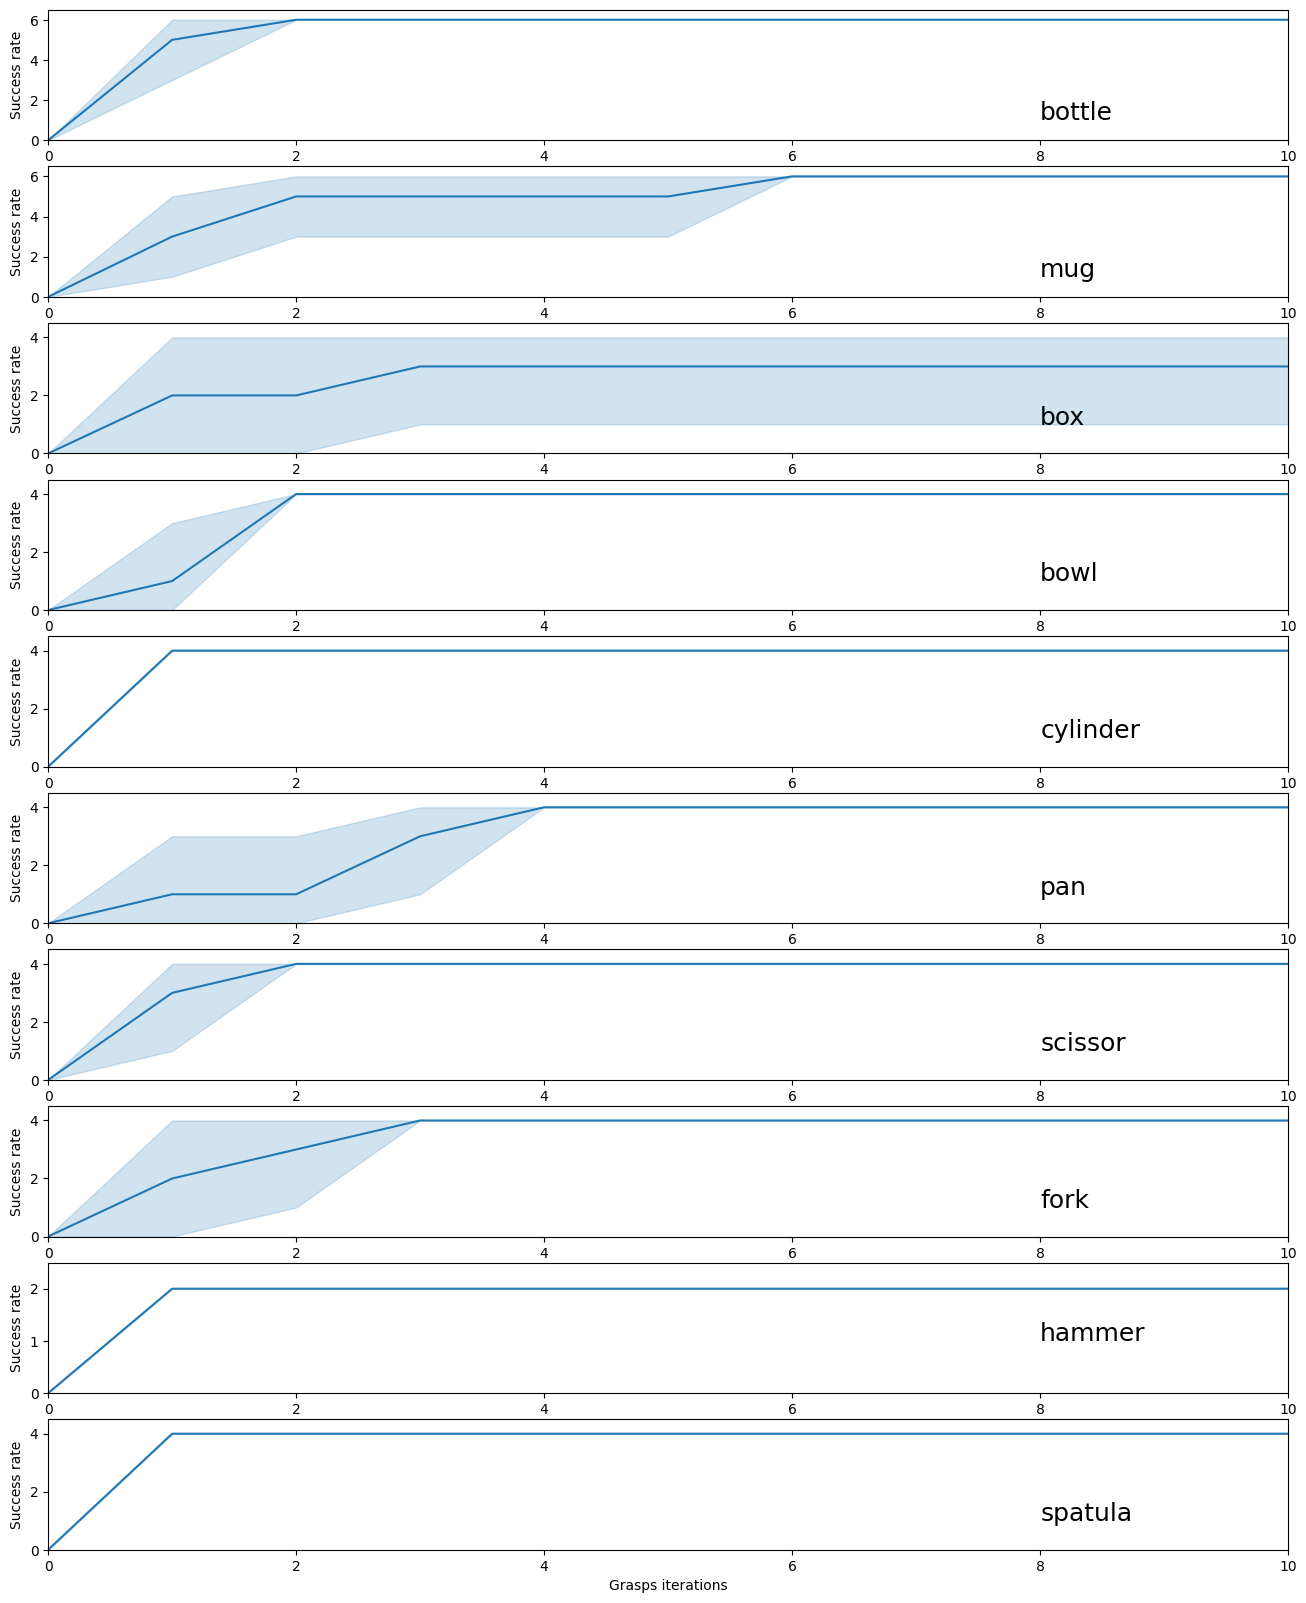

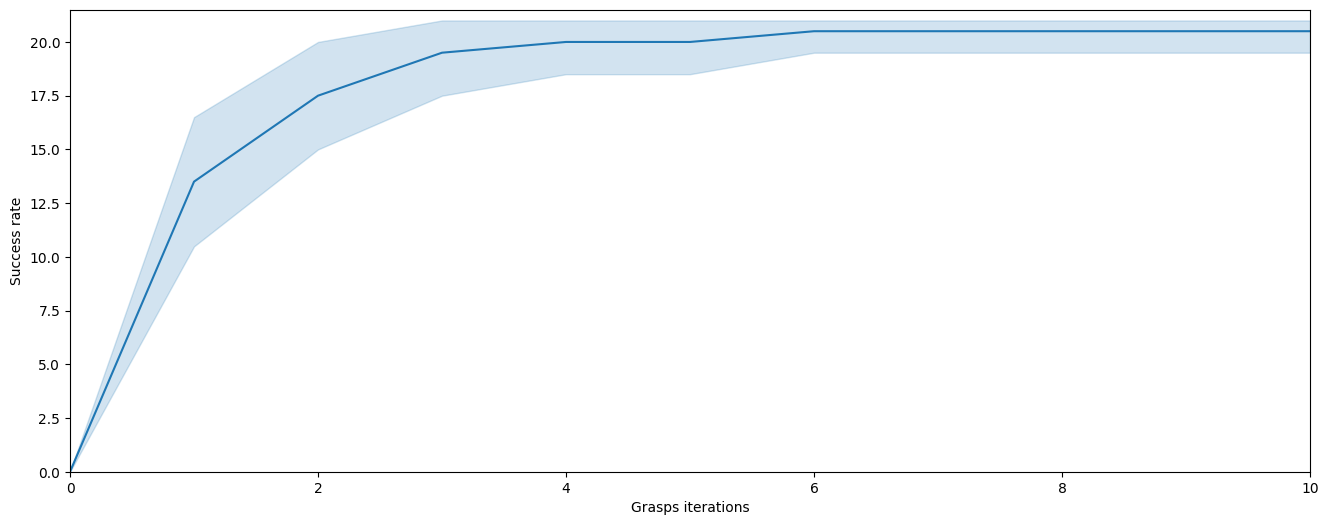

(420,) (420,)


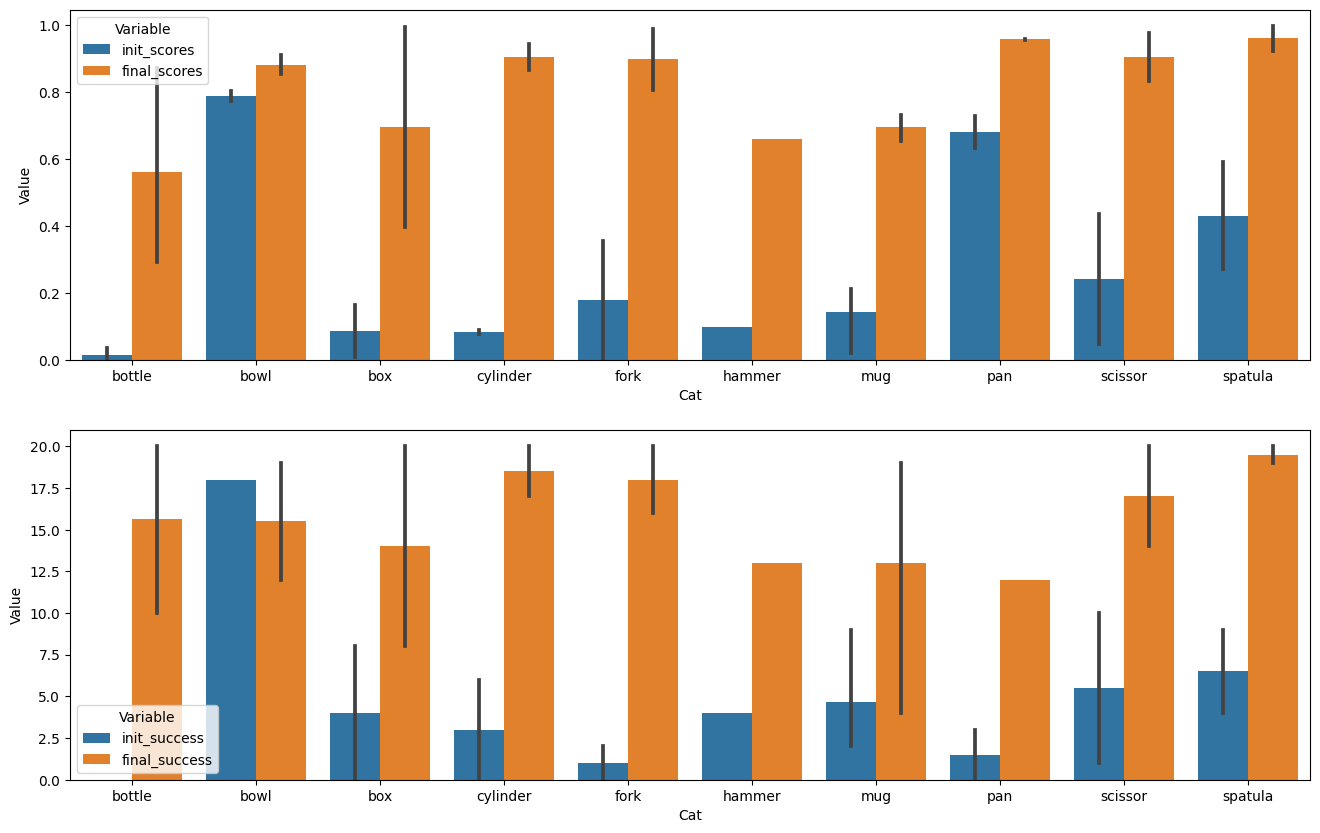

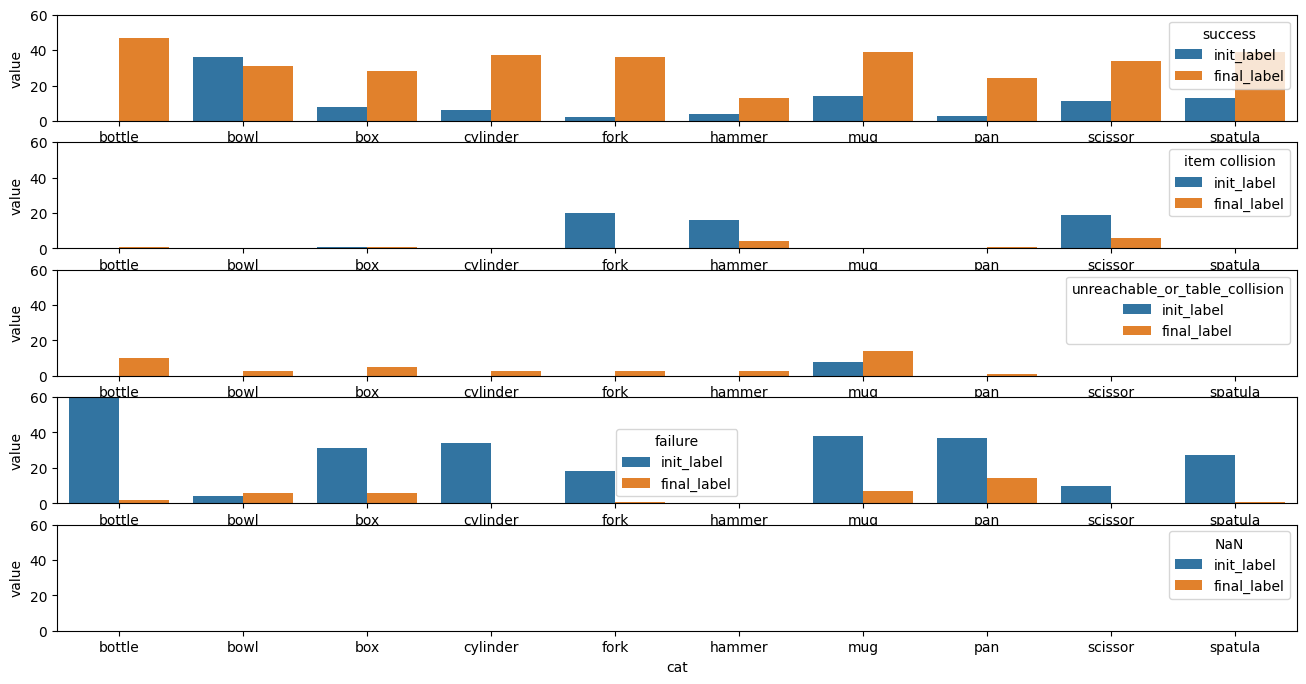

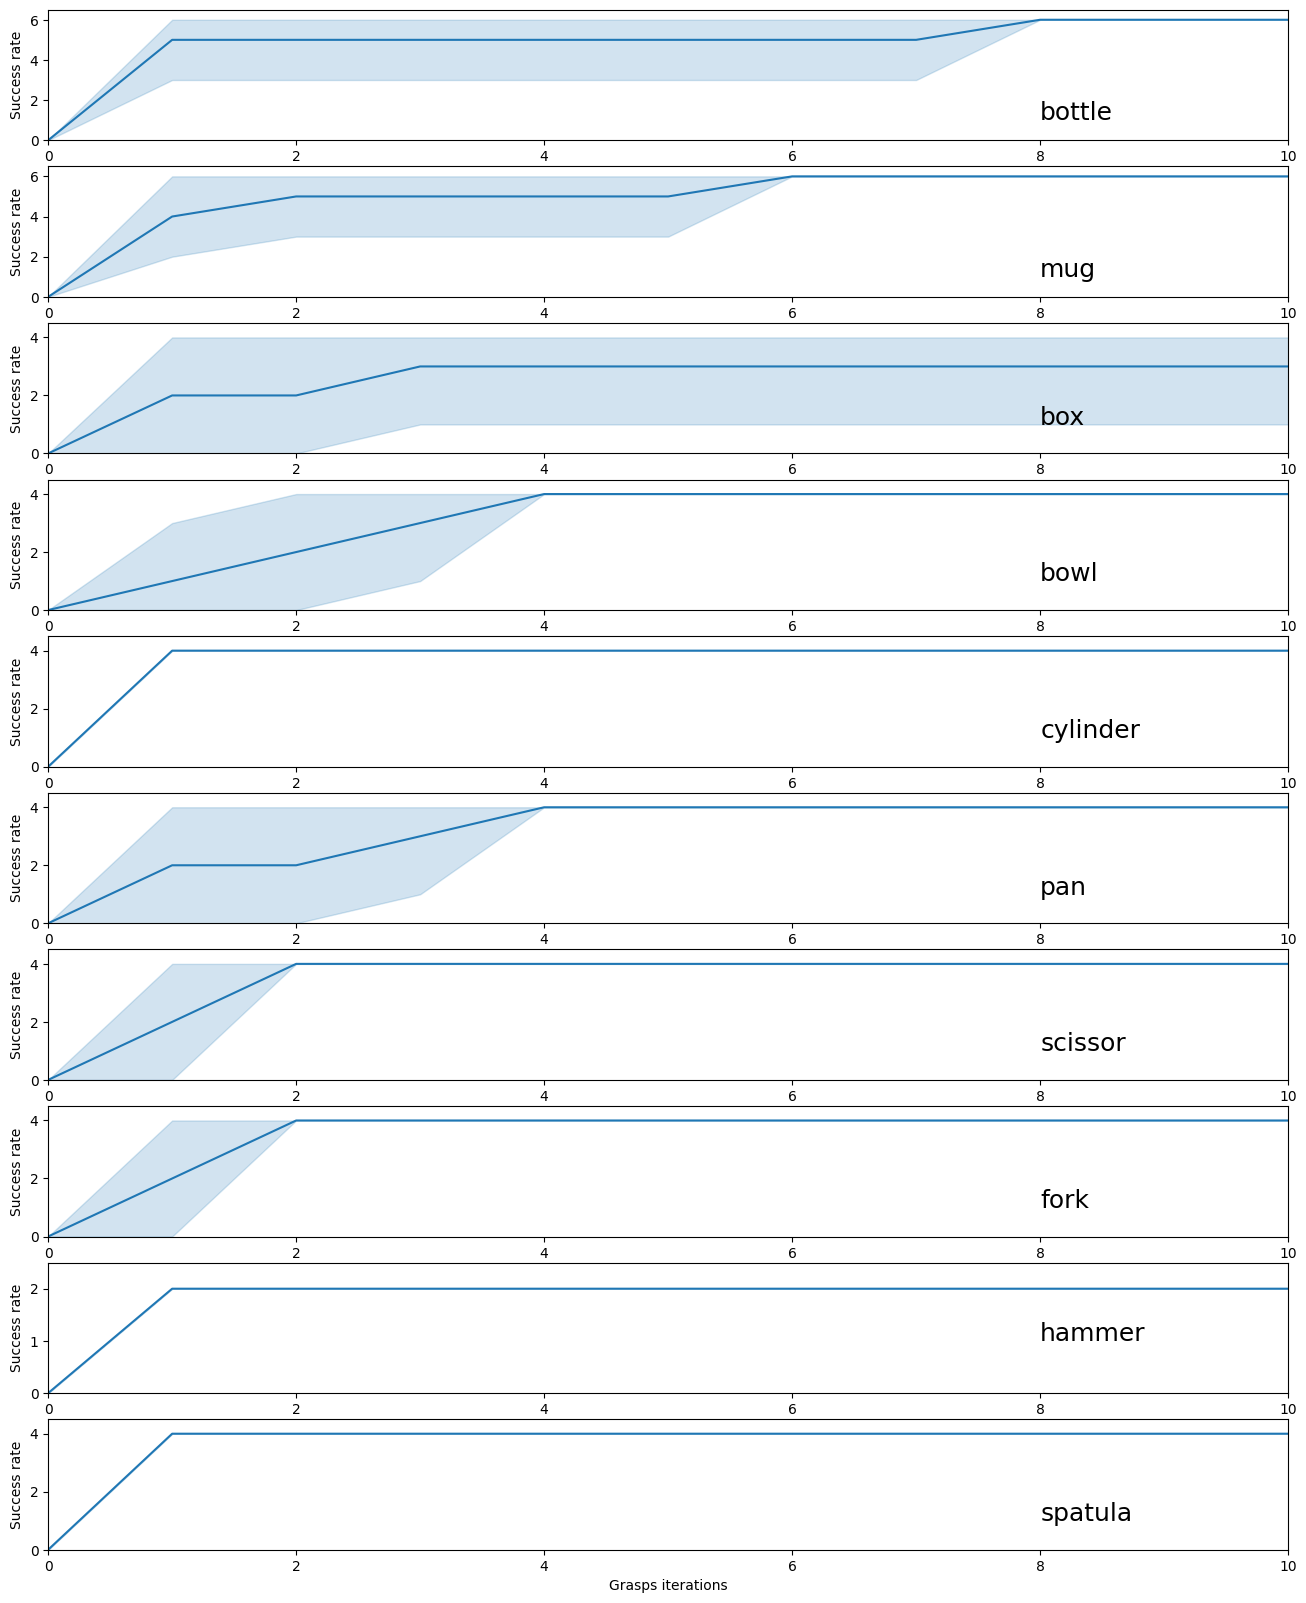

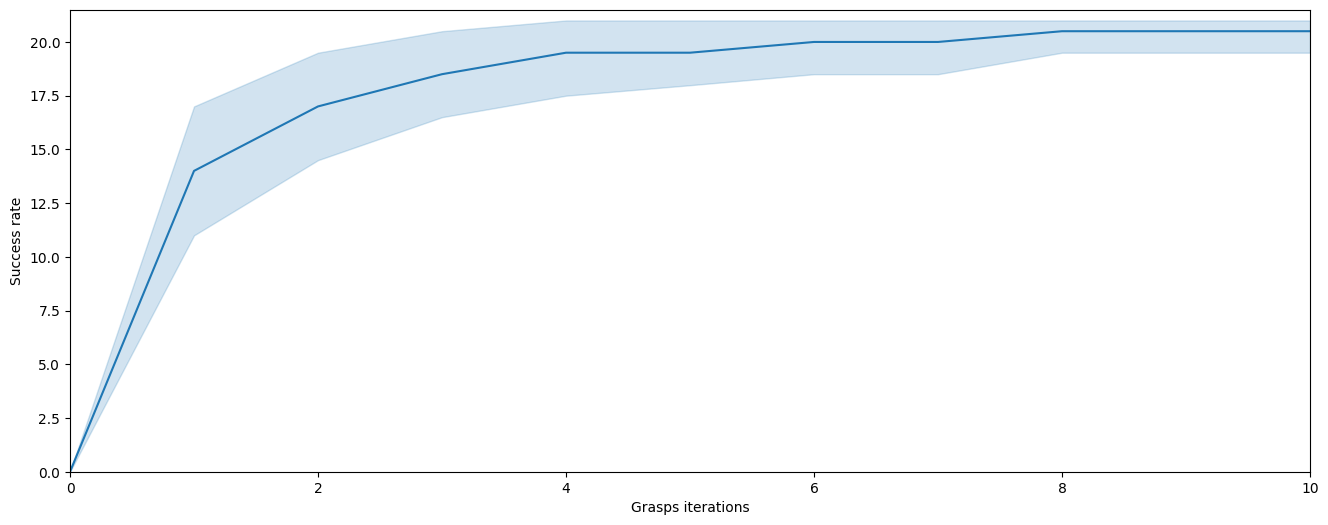

(420,) (420,)


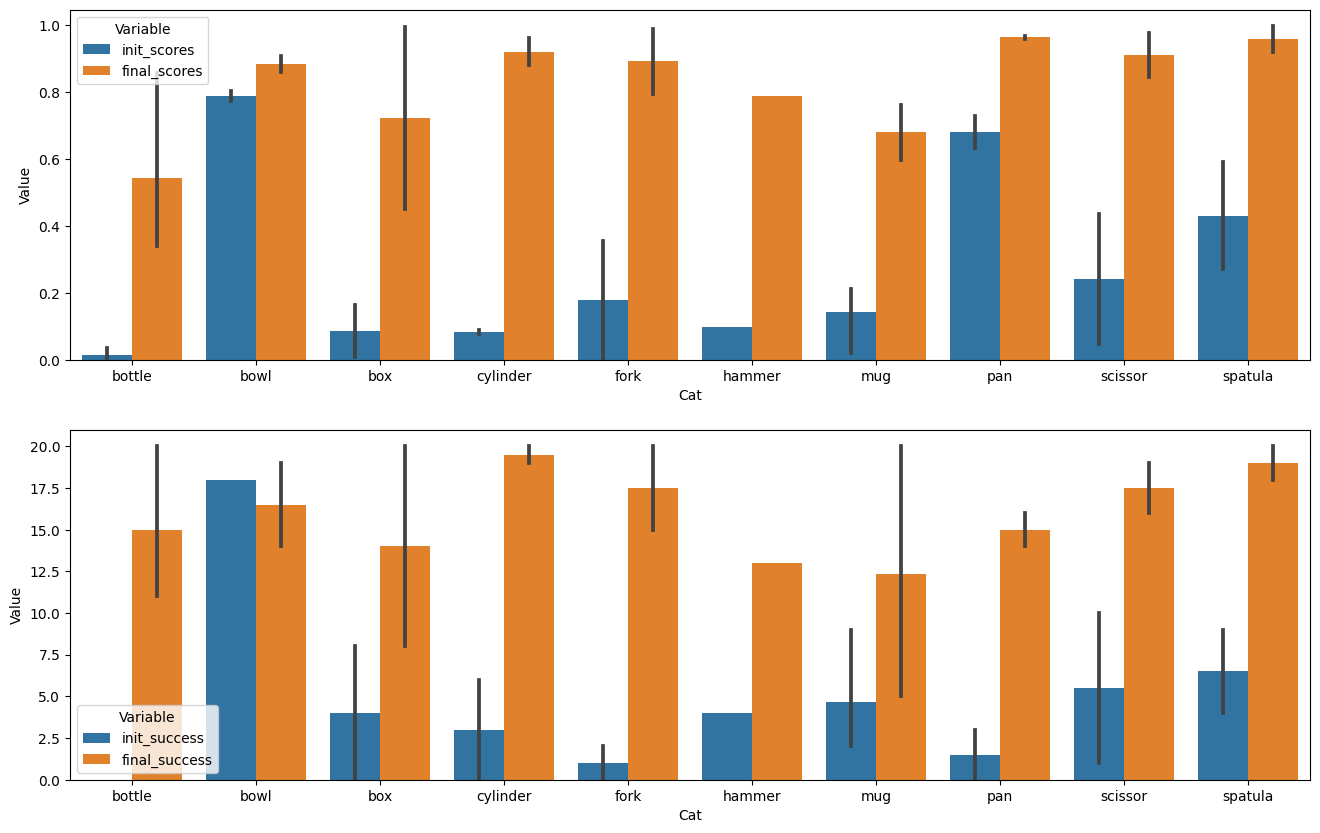

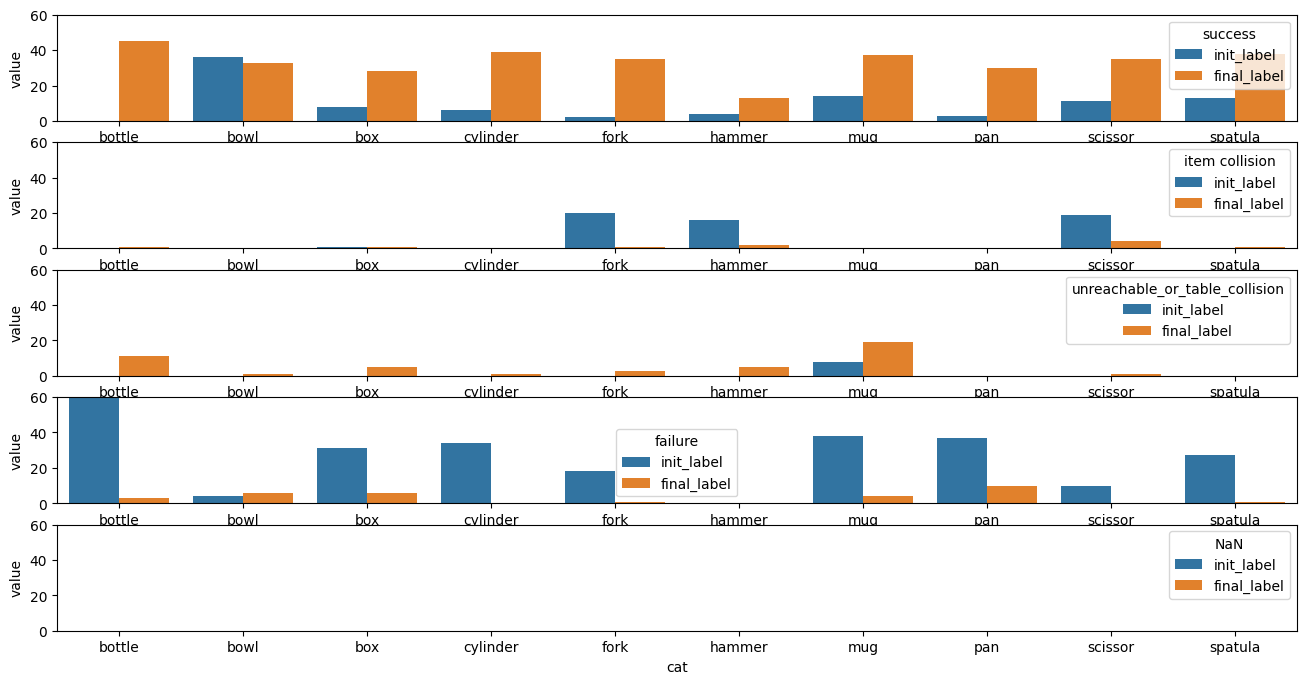

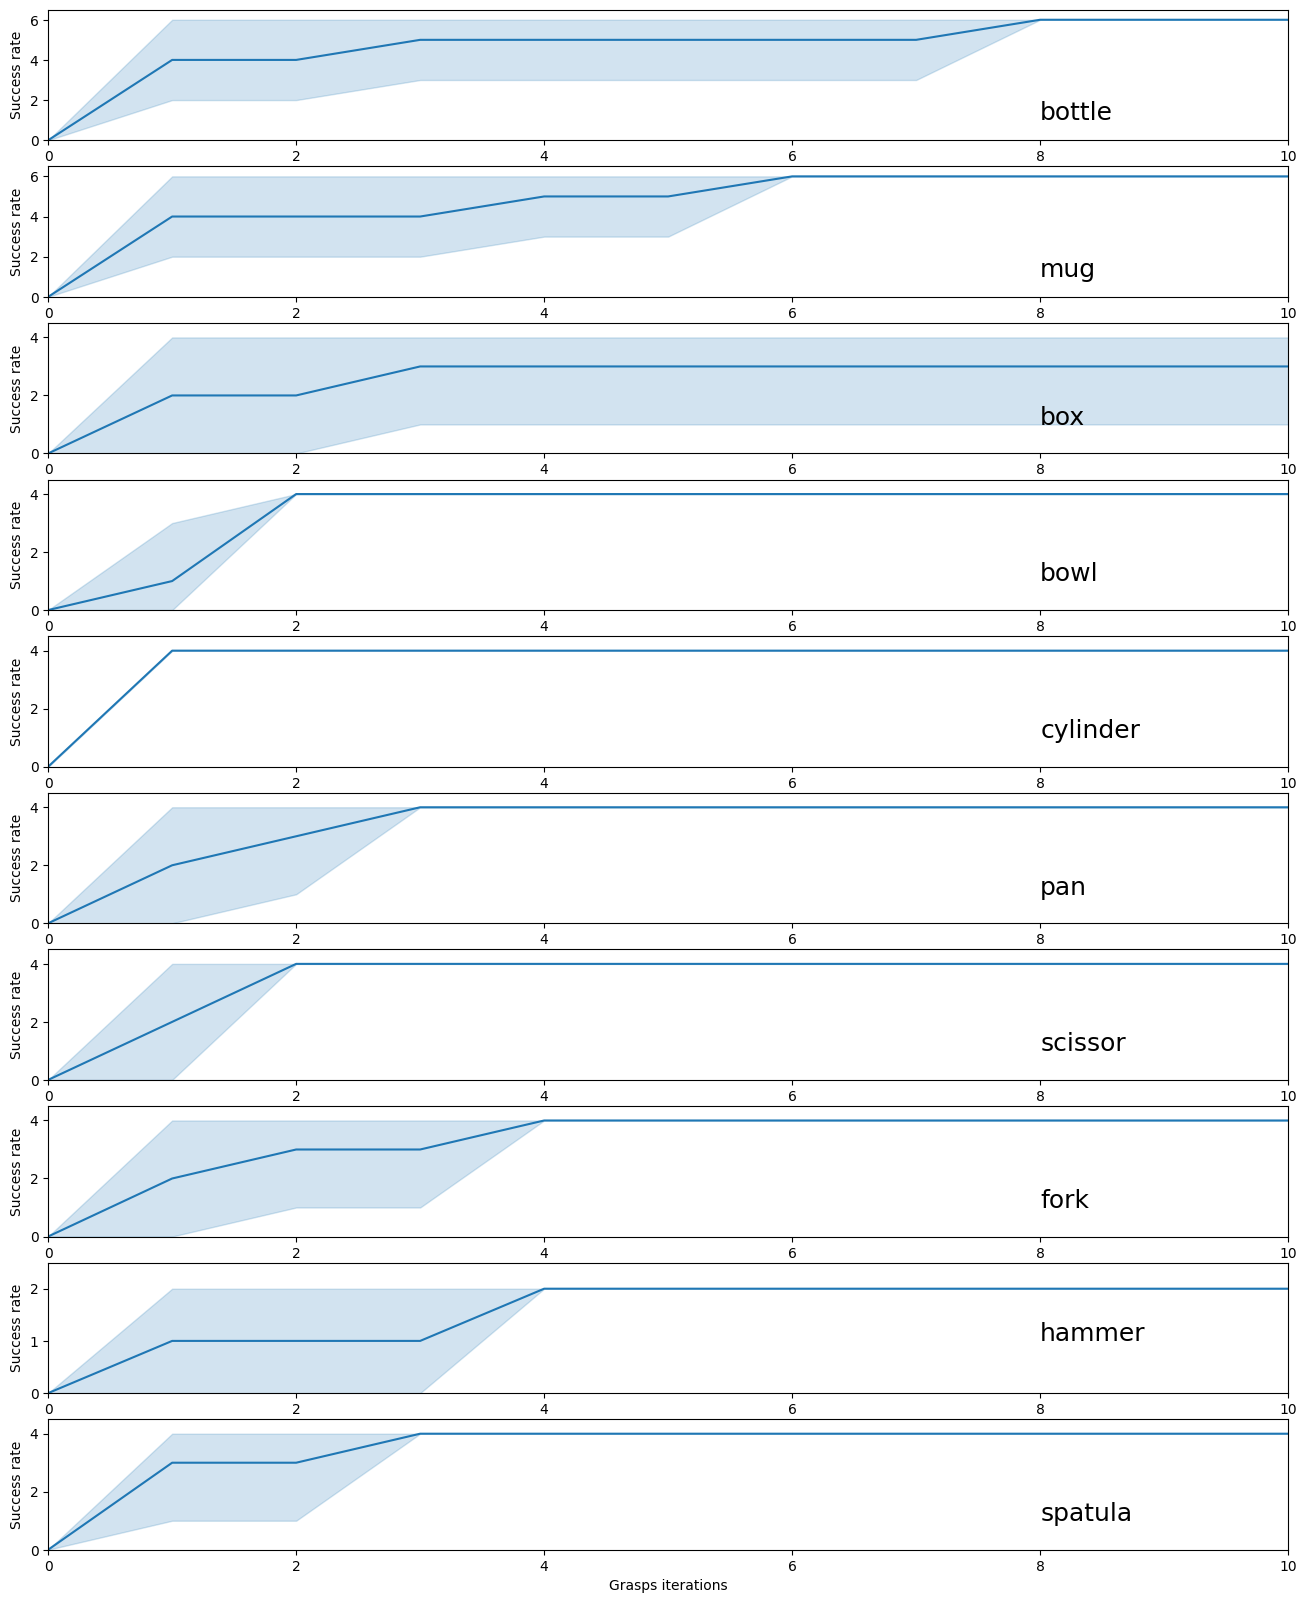

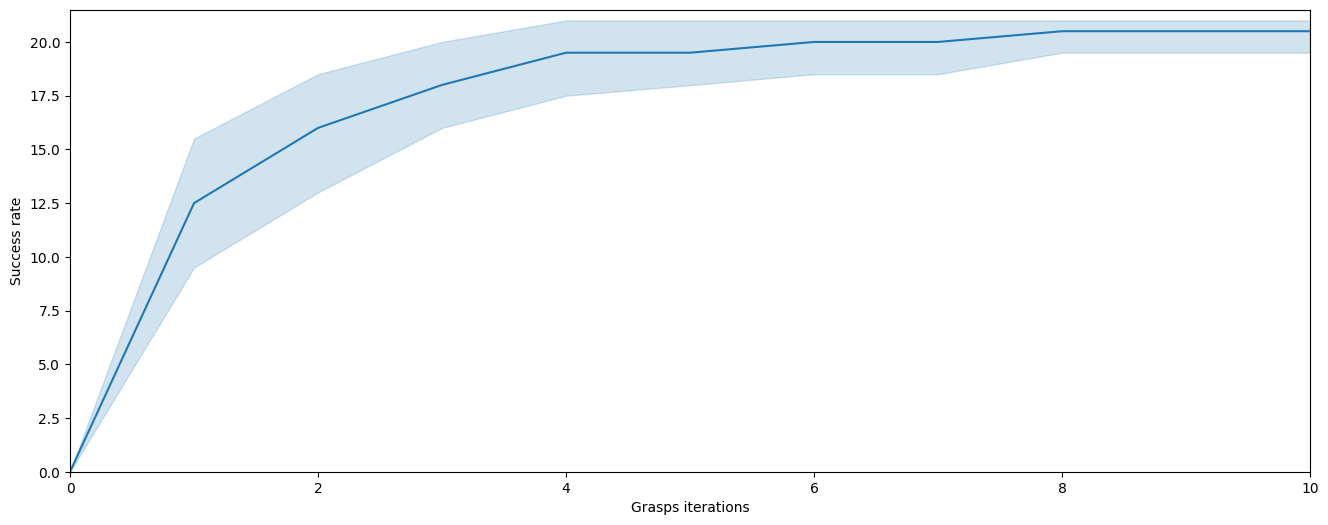

(420,) (420,)


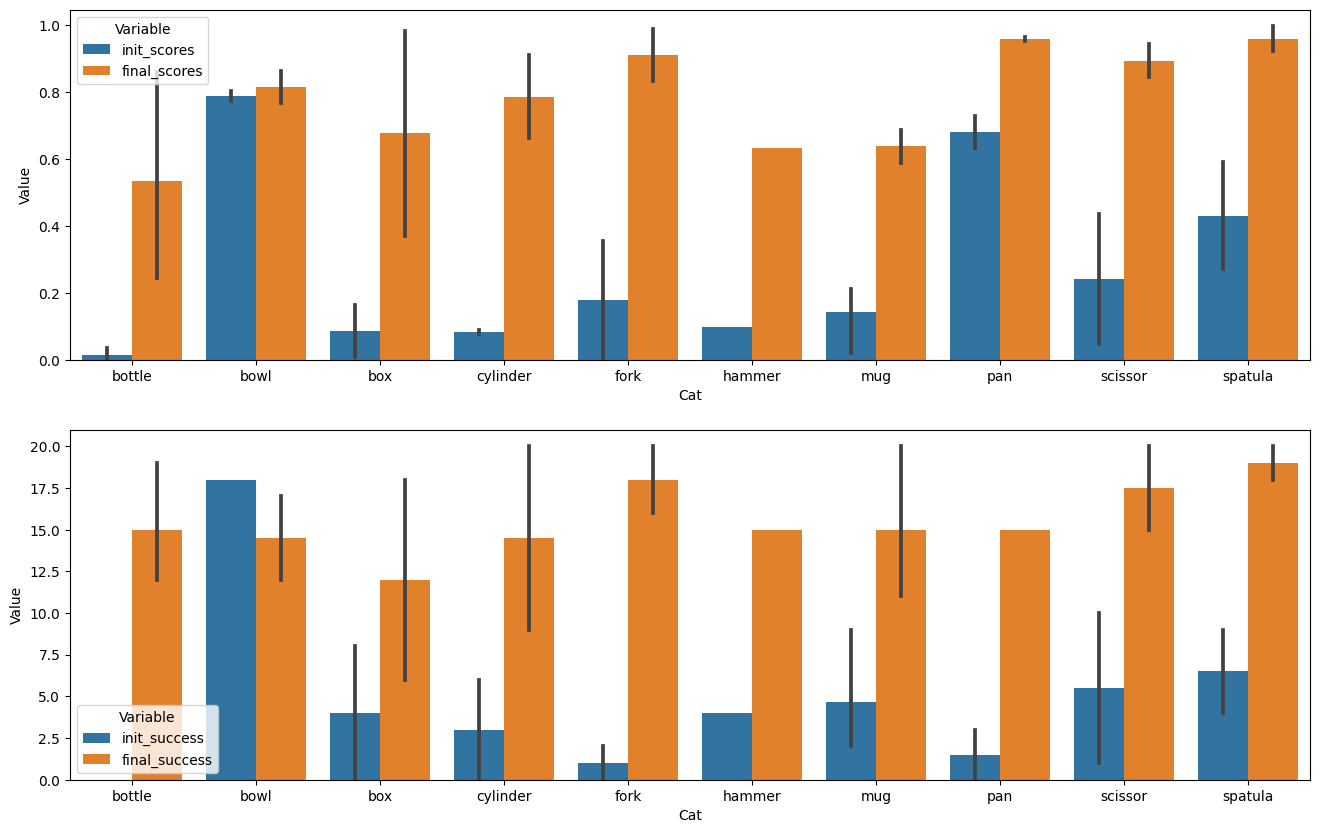

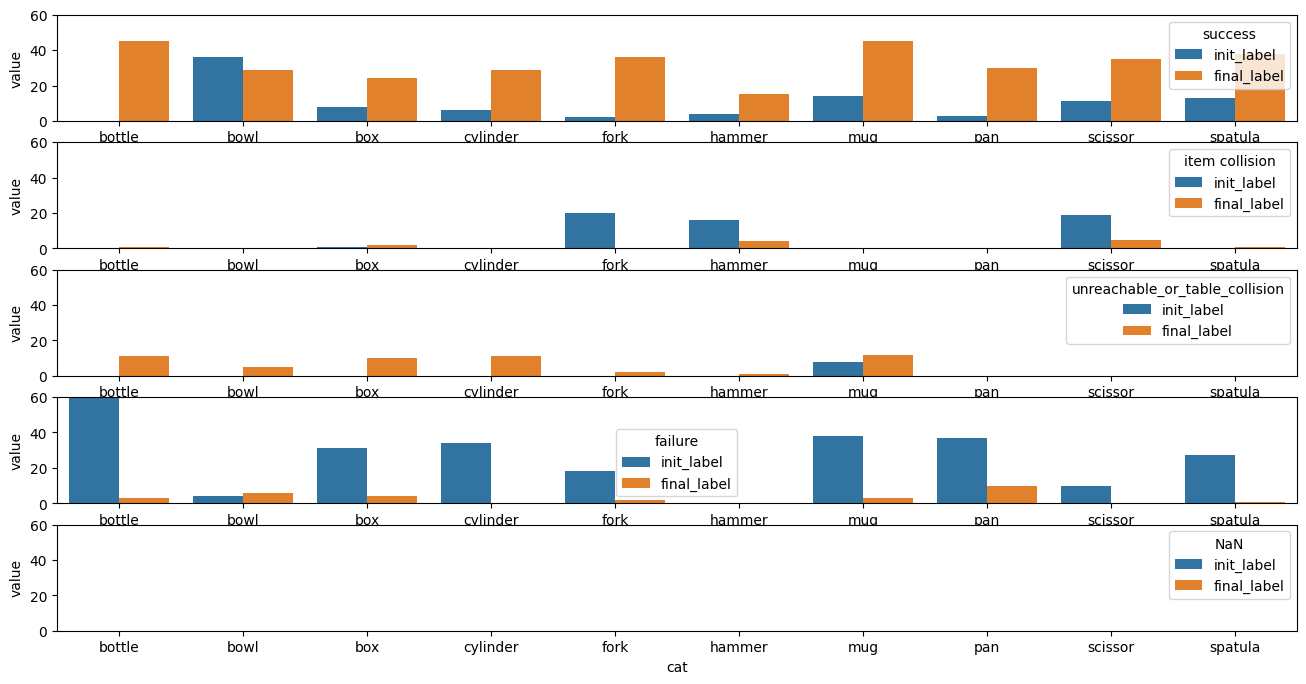

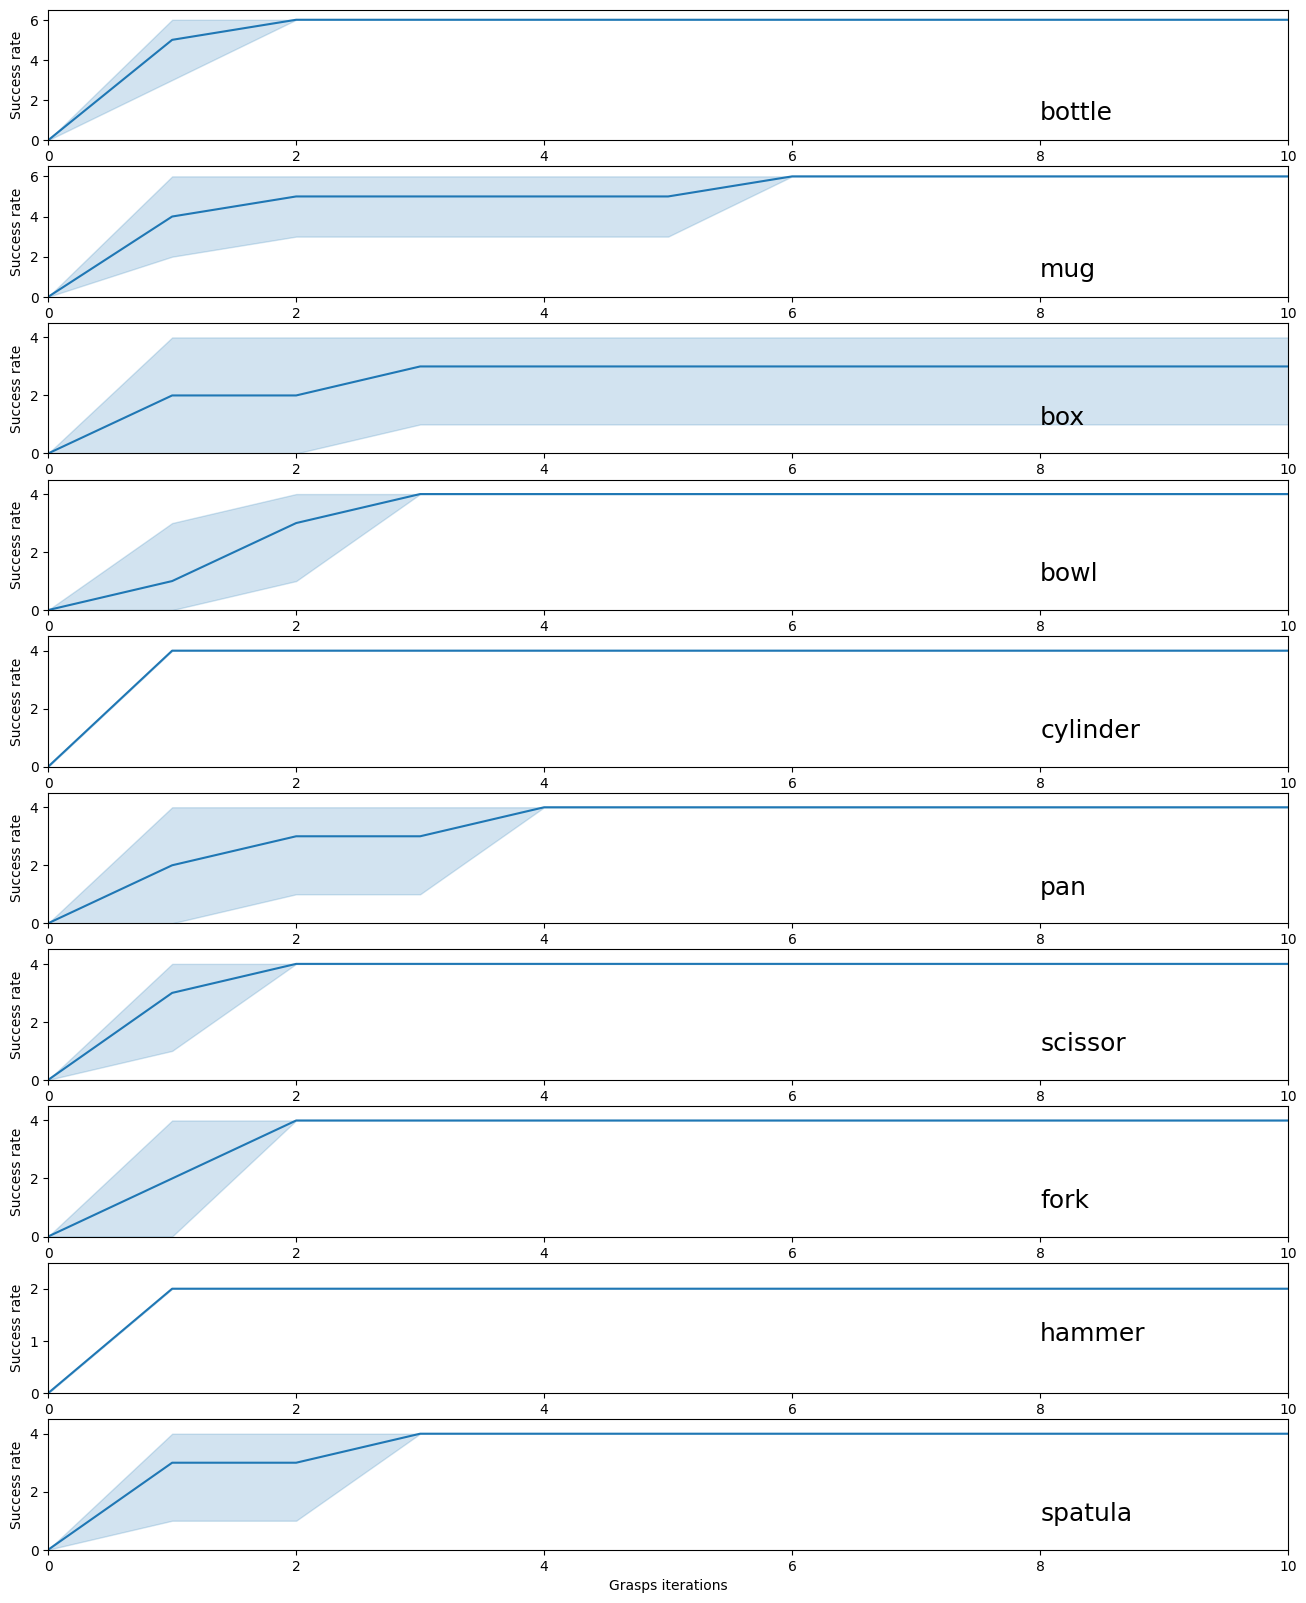

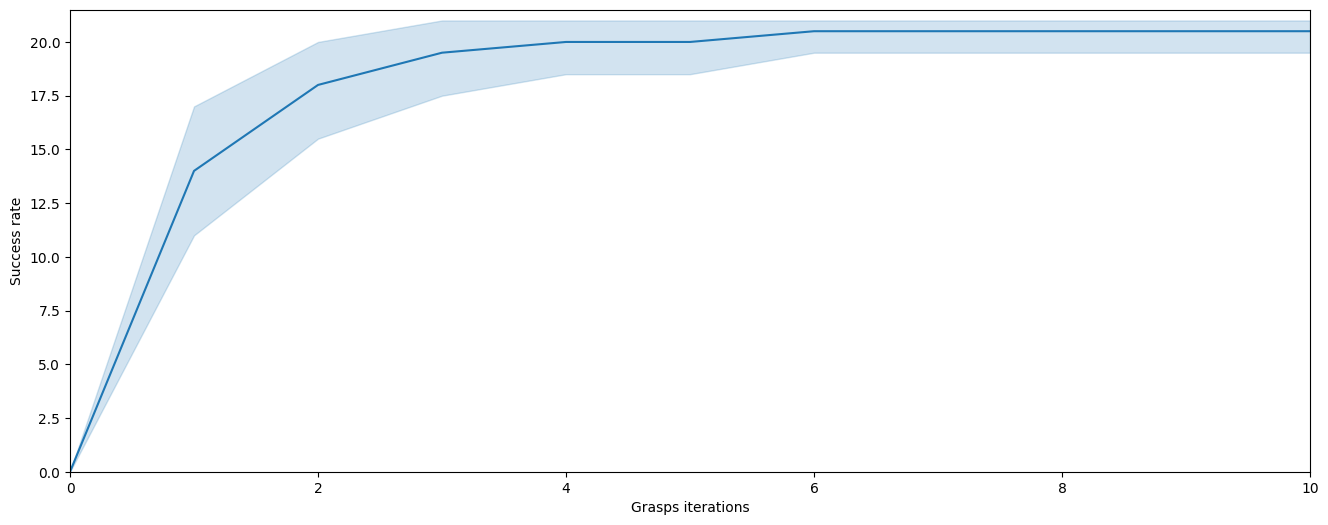

(420,) (420,)


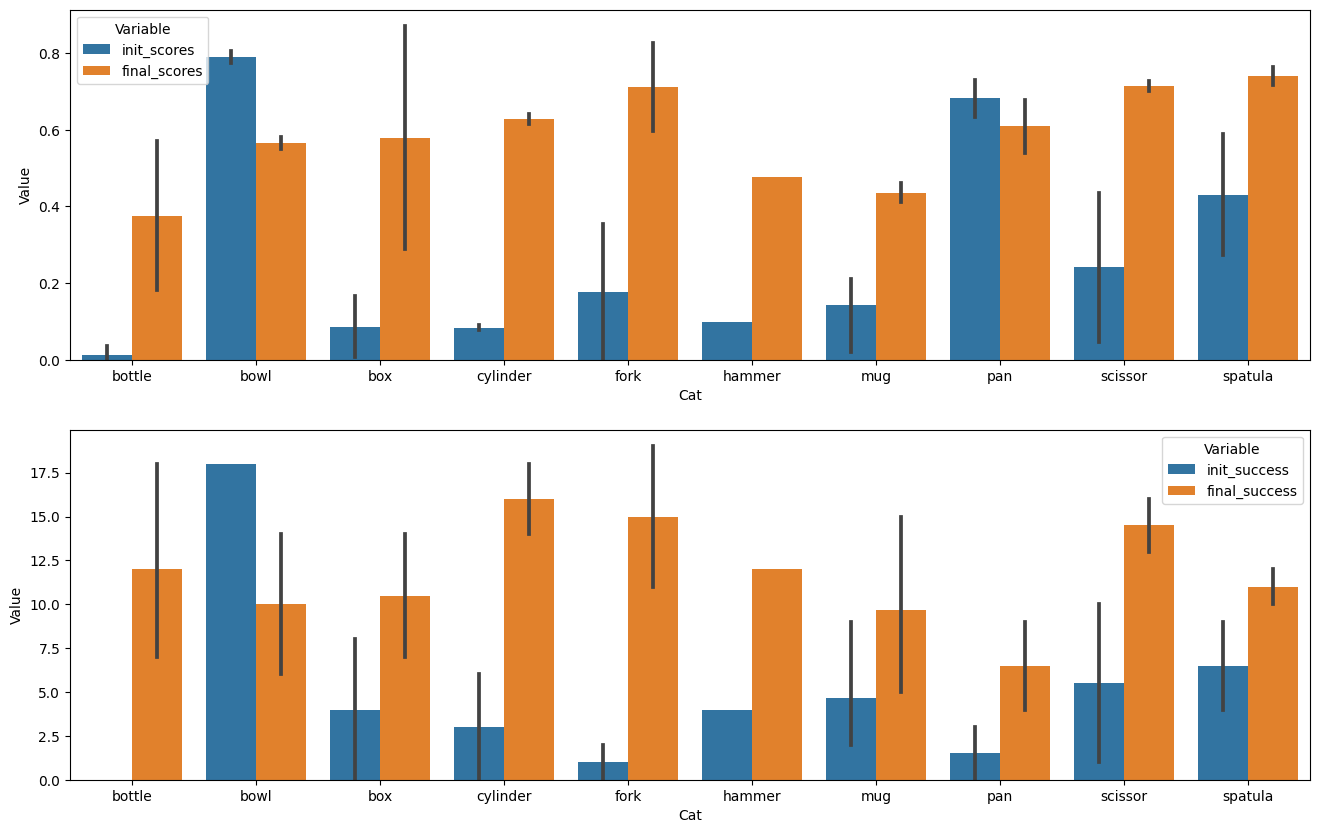

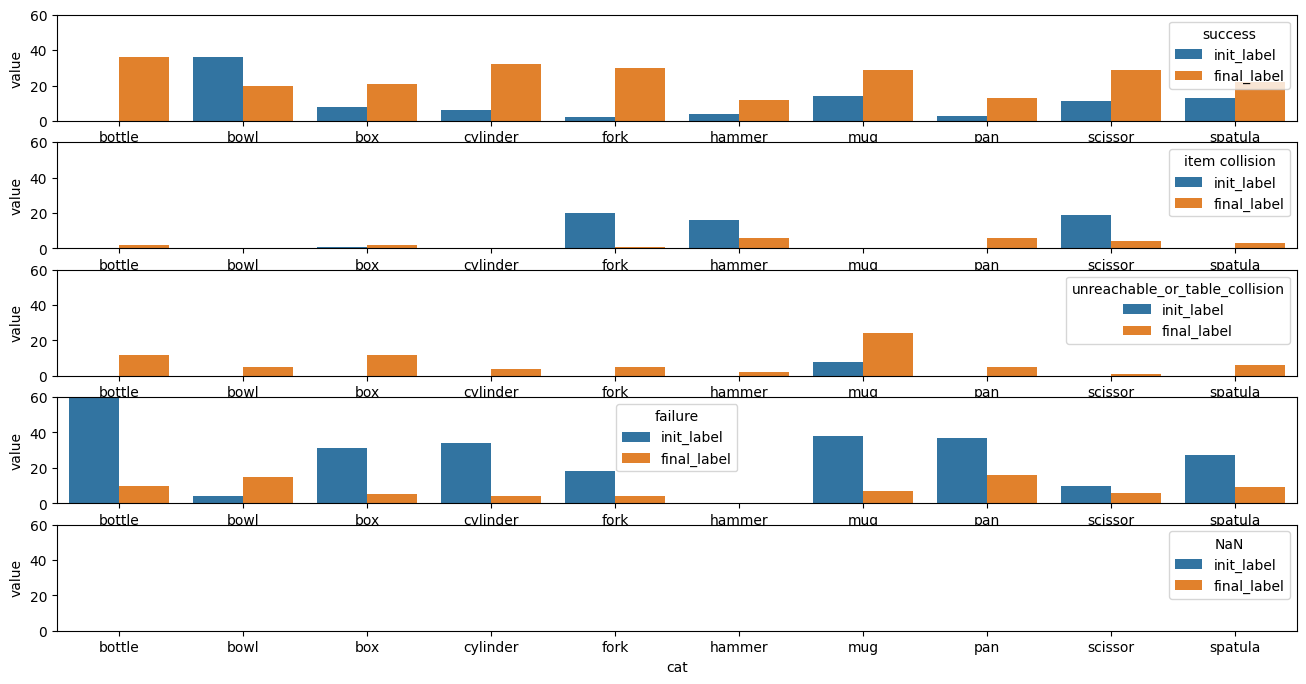

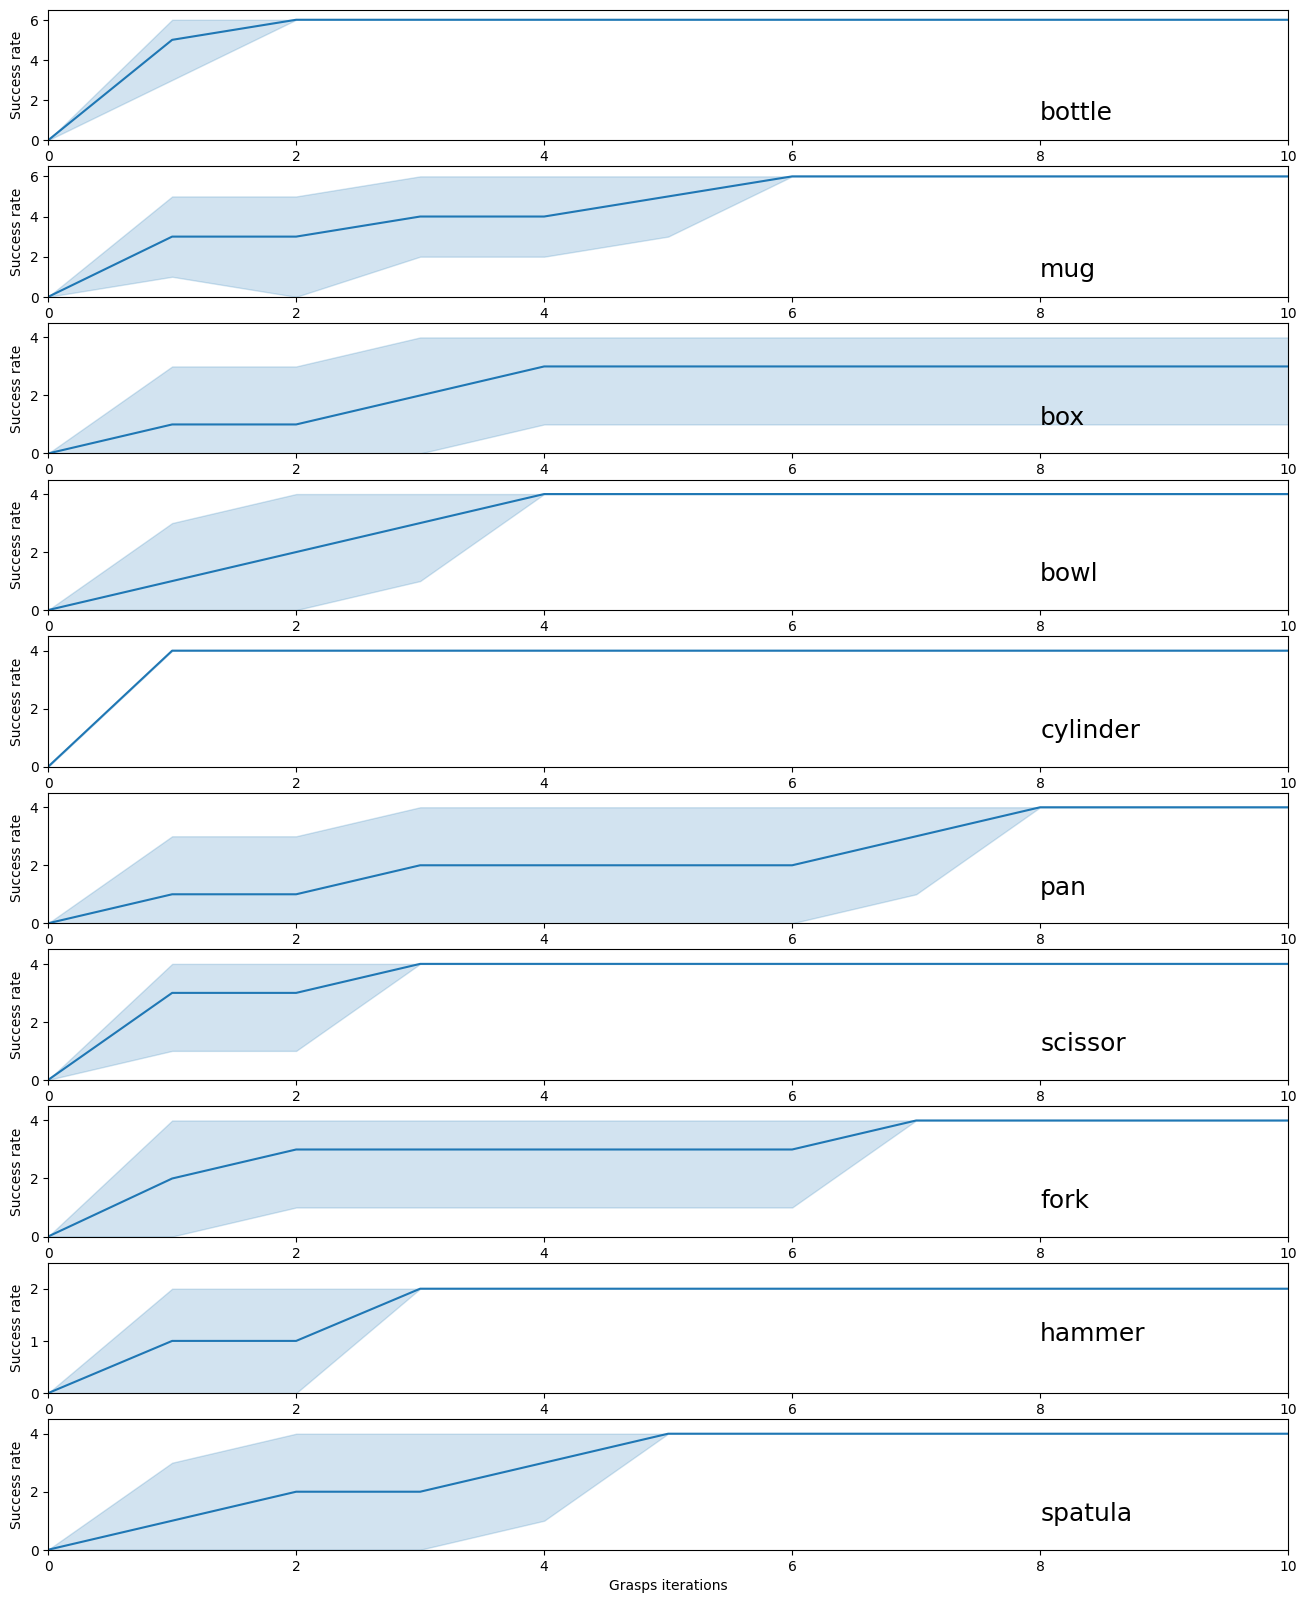

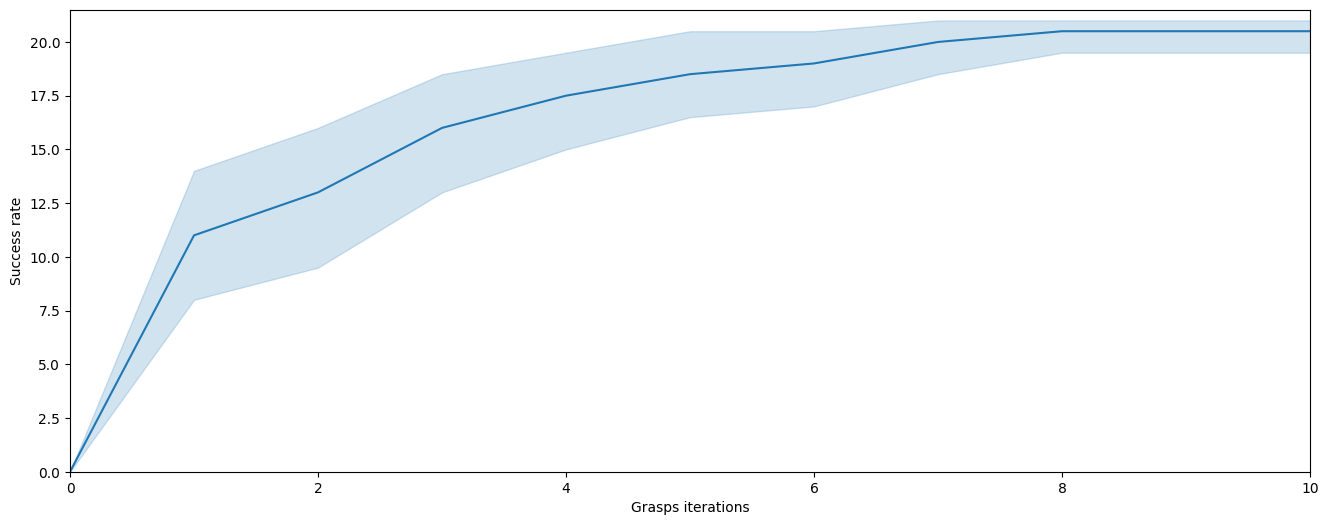

(420,) (420,)


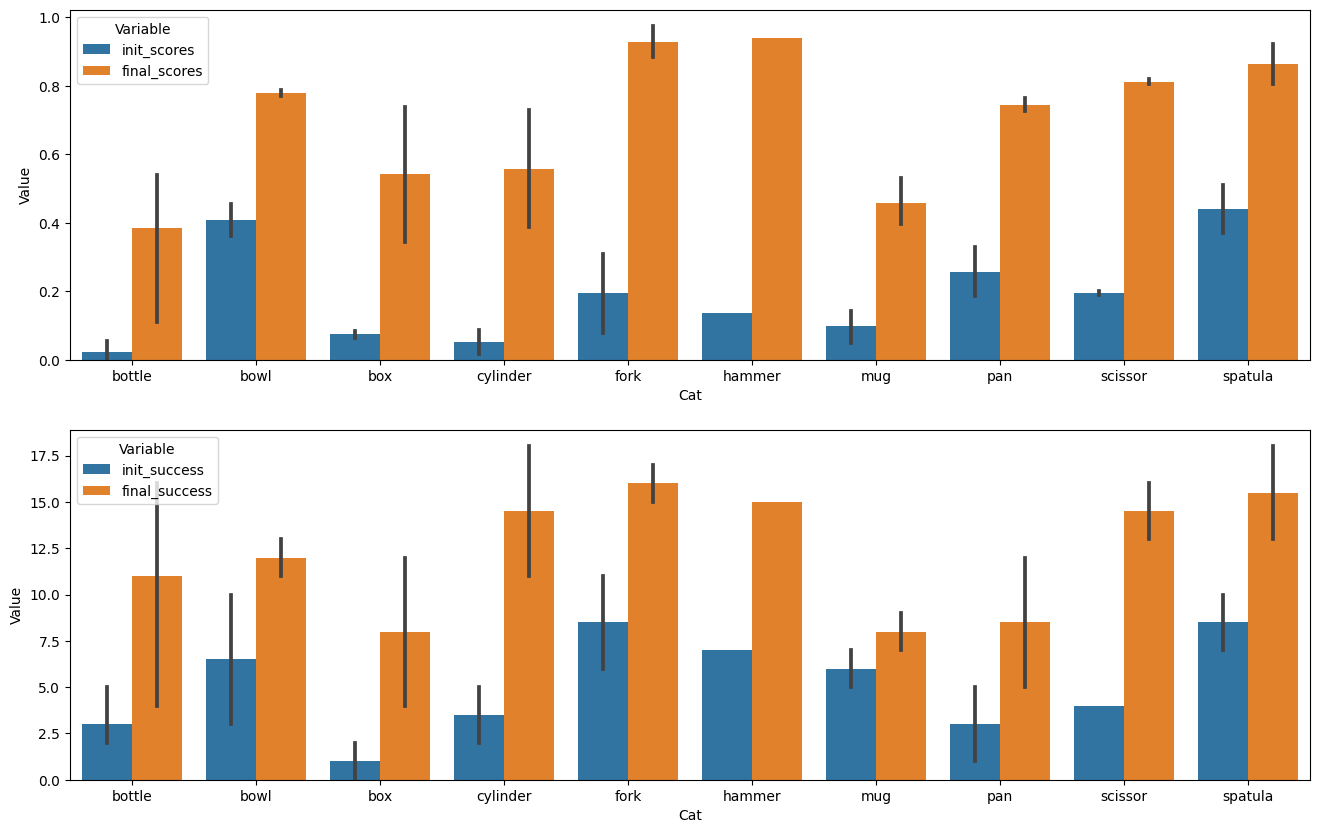

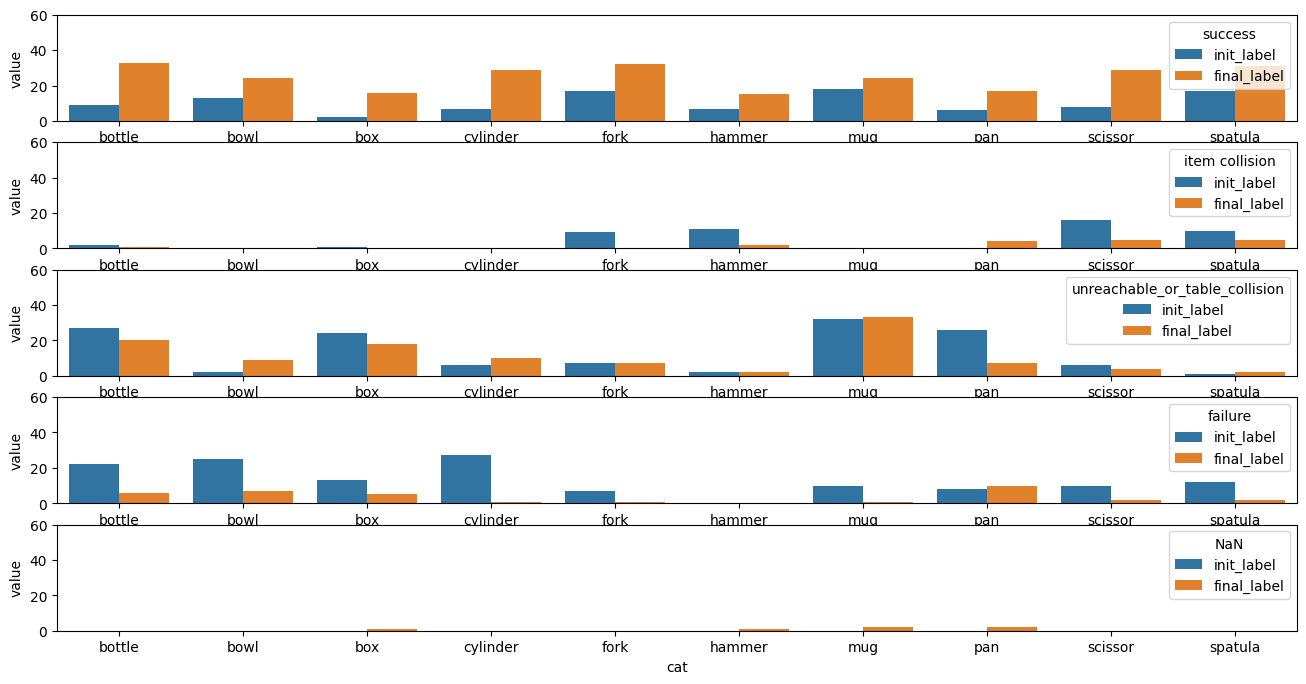

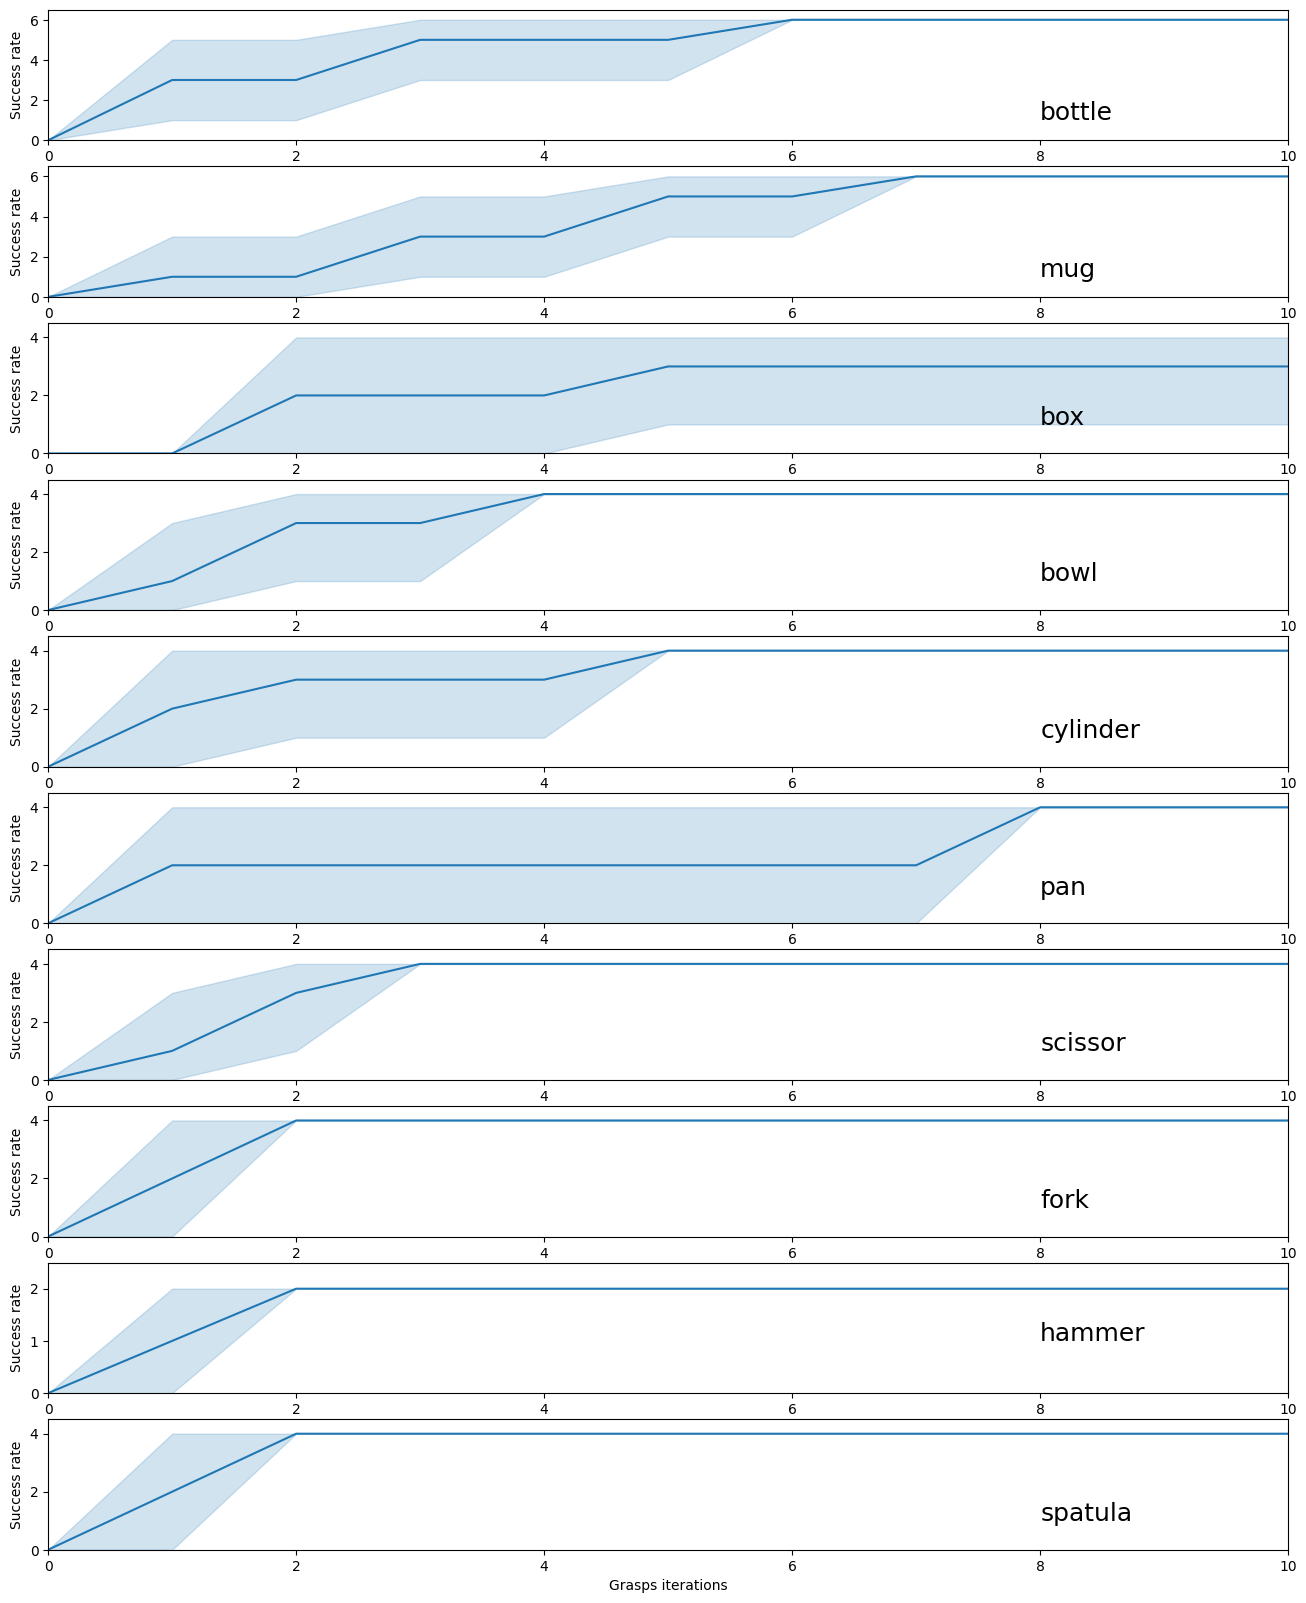

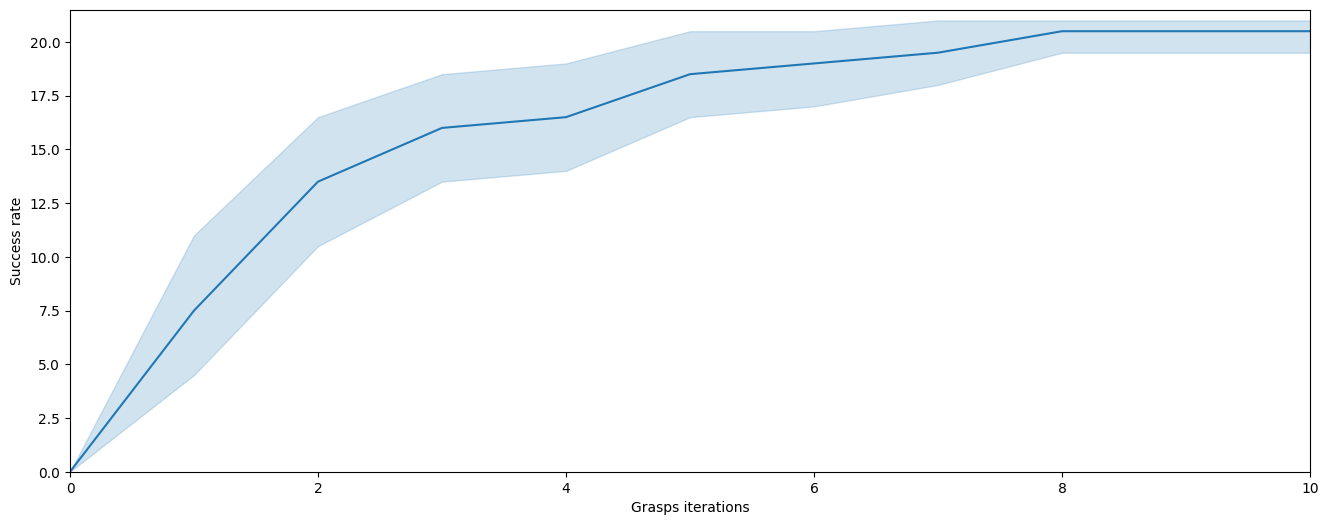

(420,) (420,)


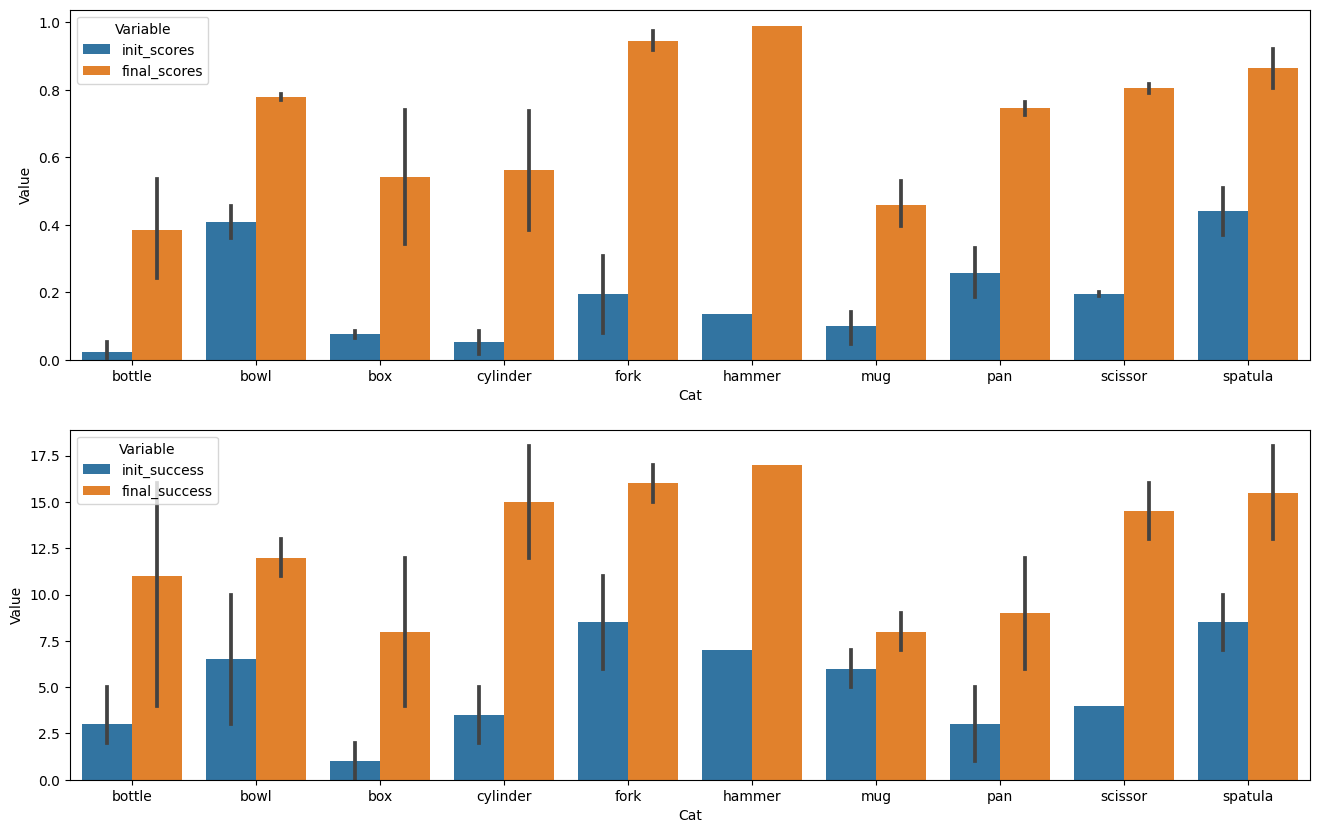

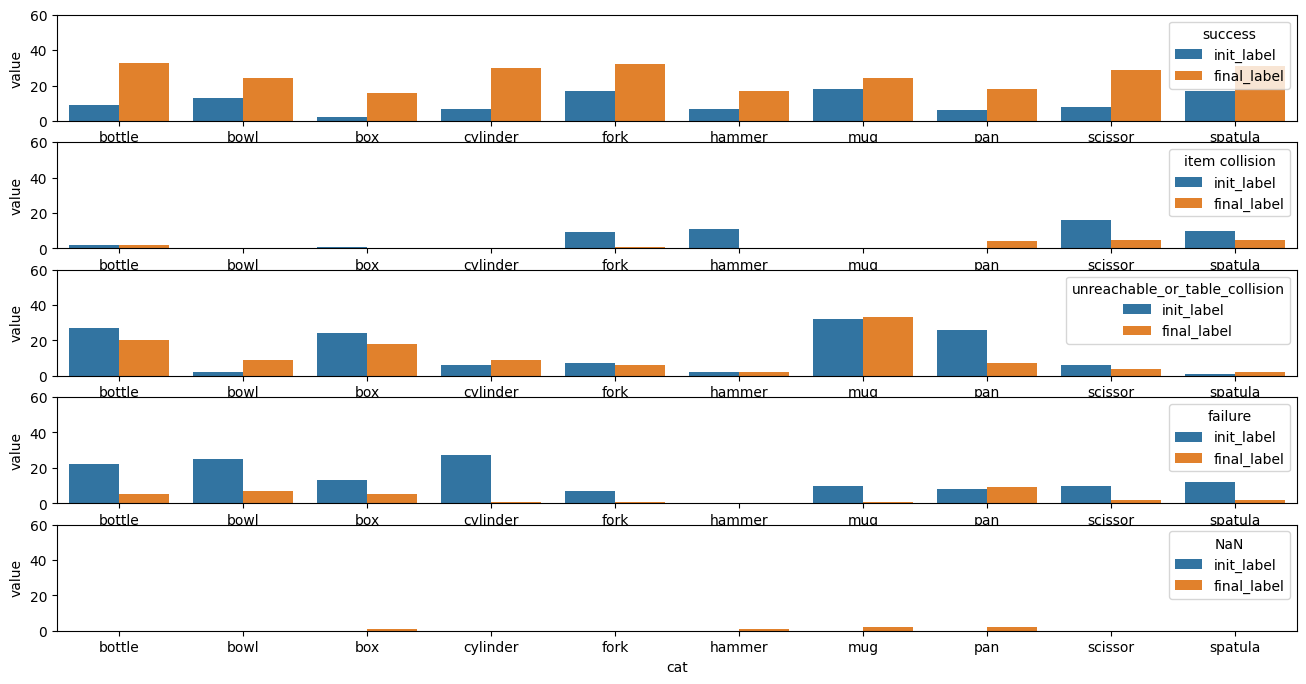

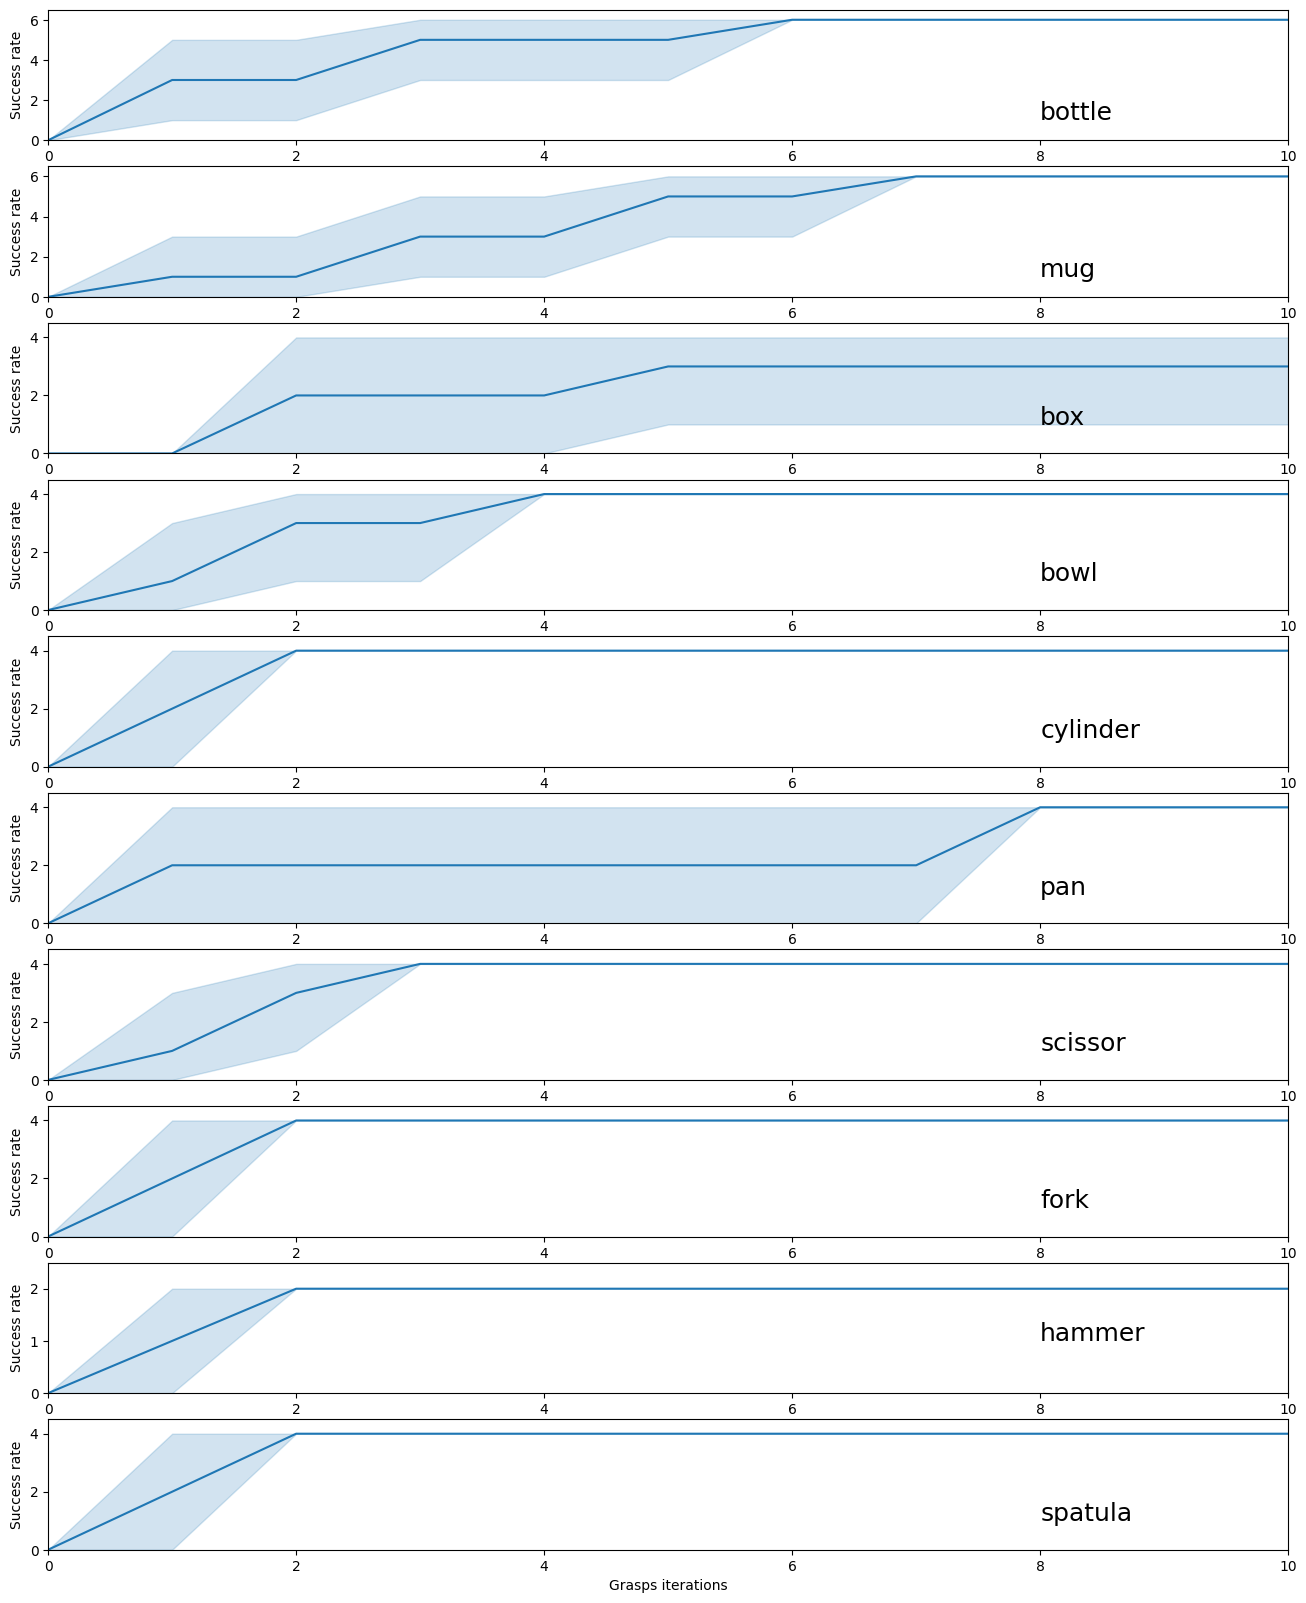

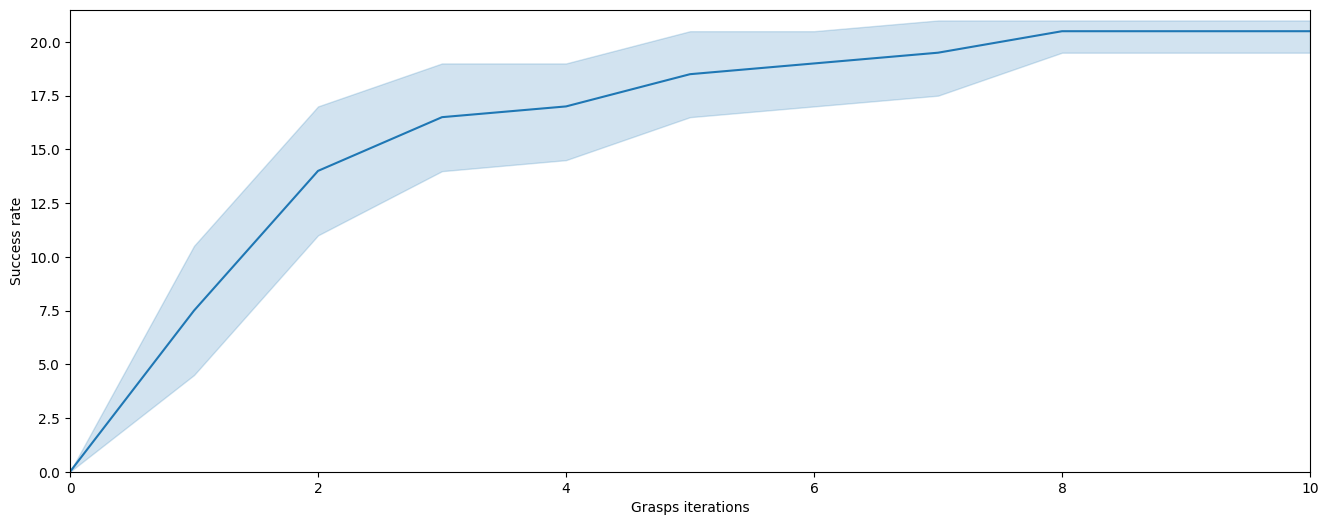

(420,) (420,)


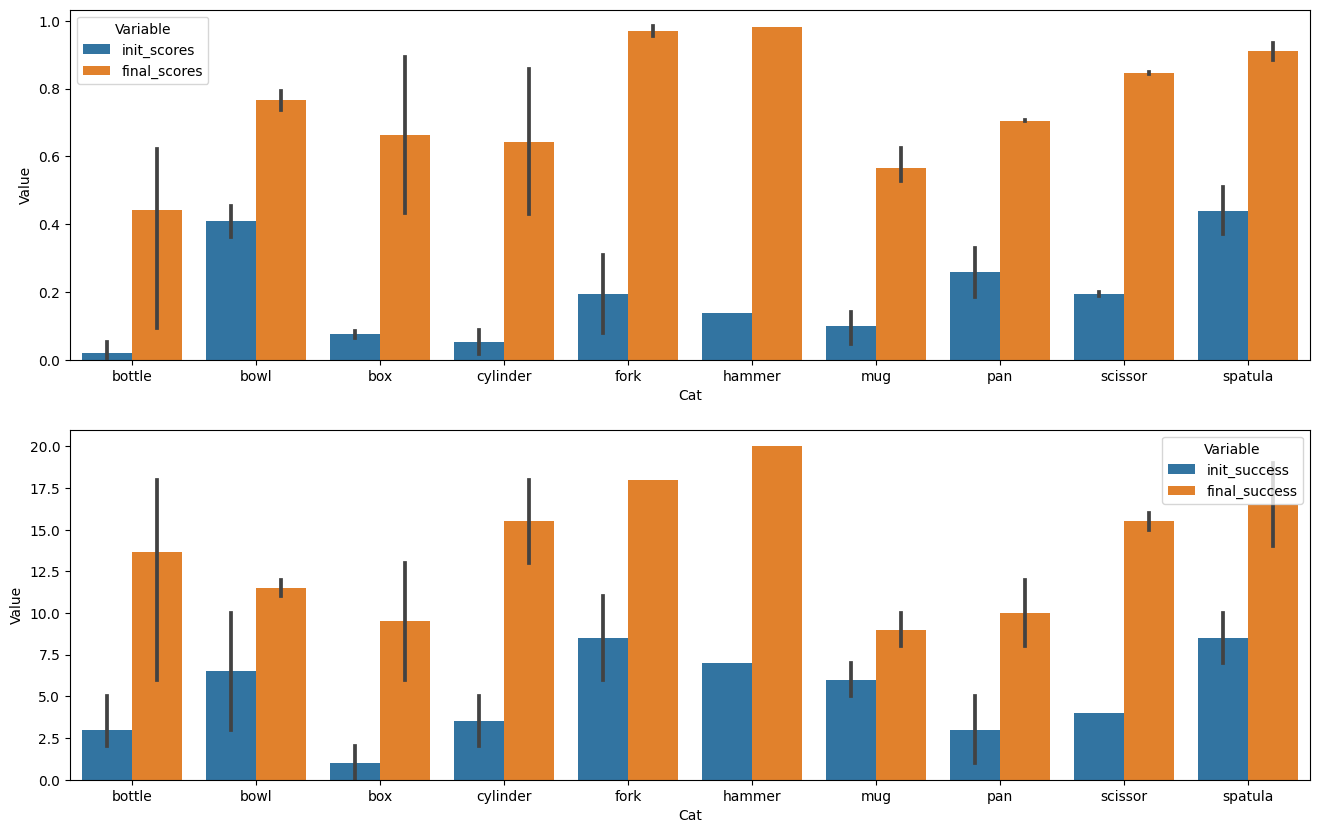

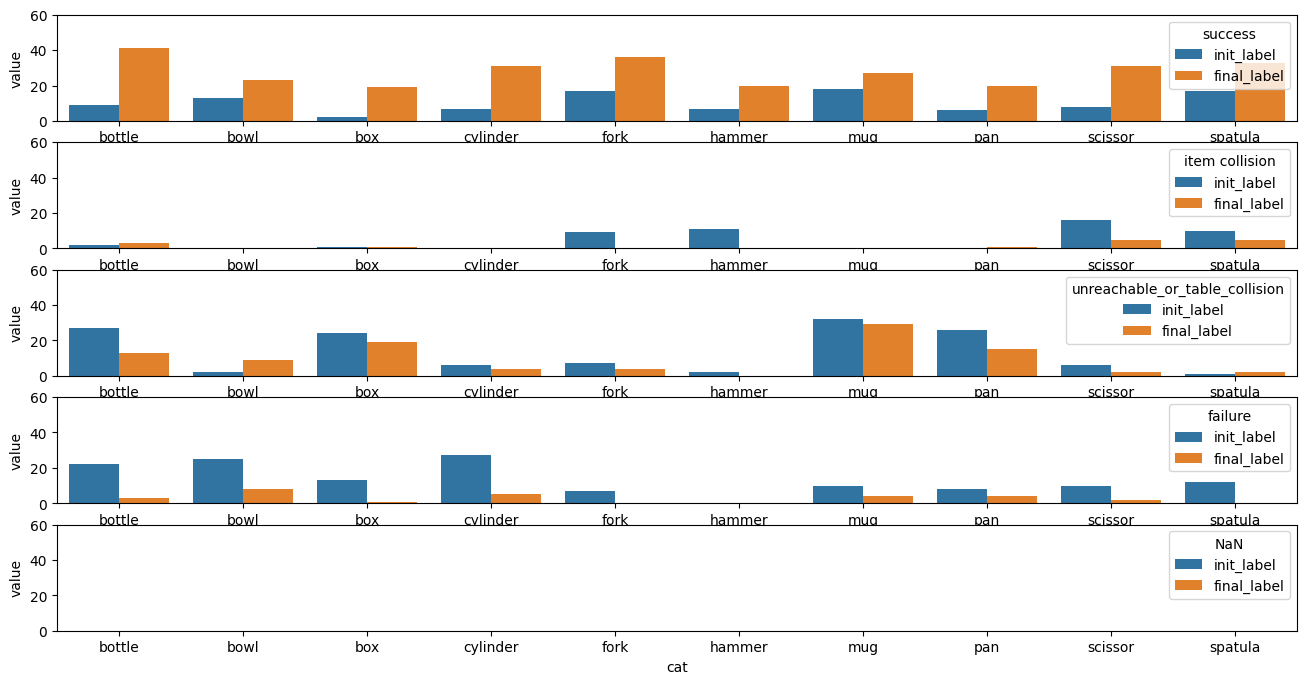

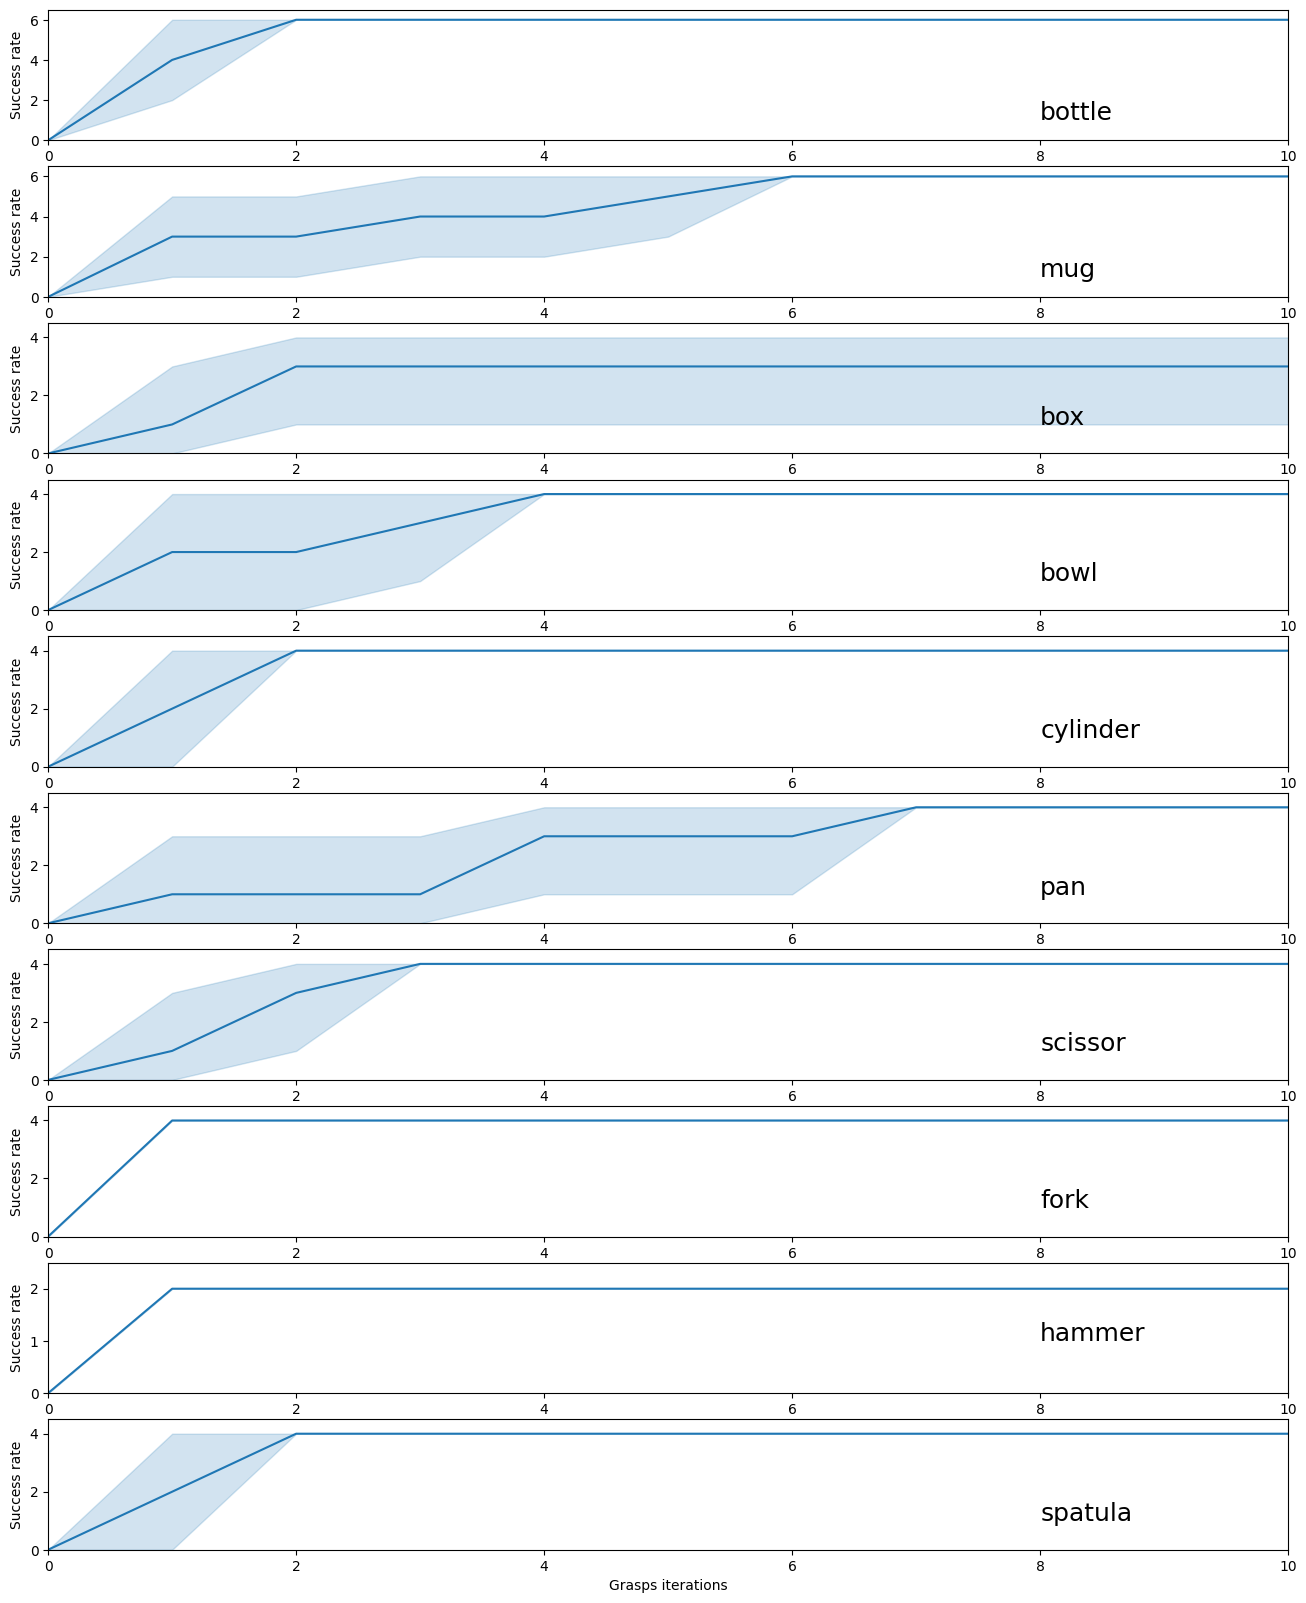

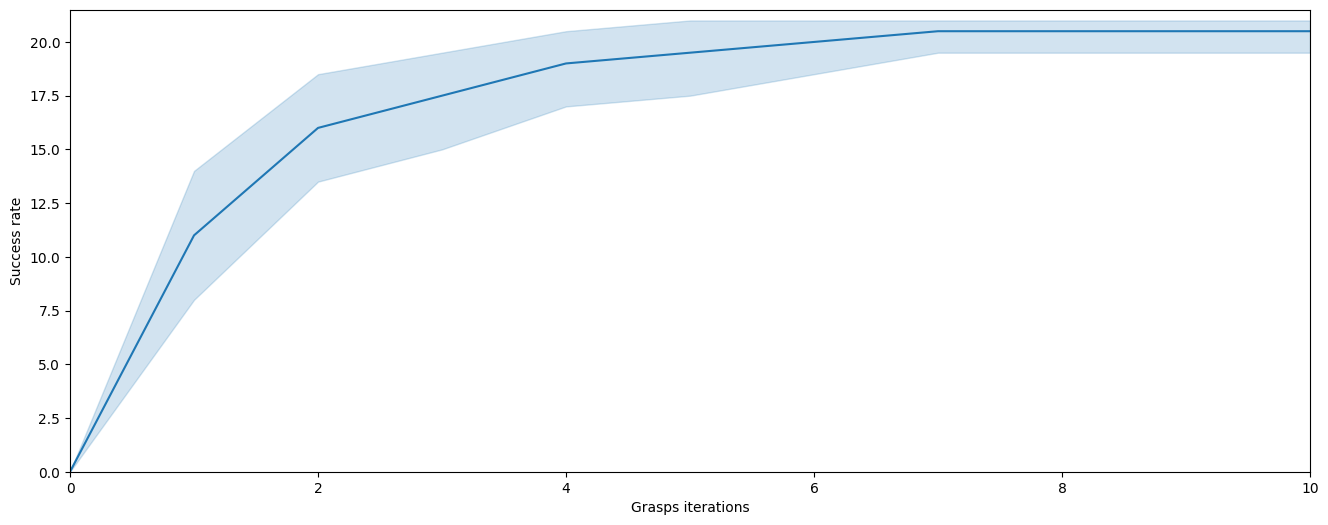

(420,) (420,)


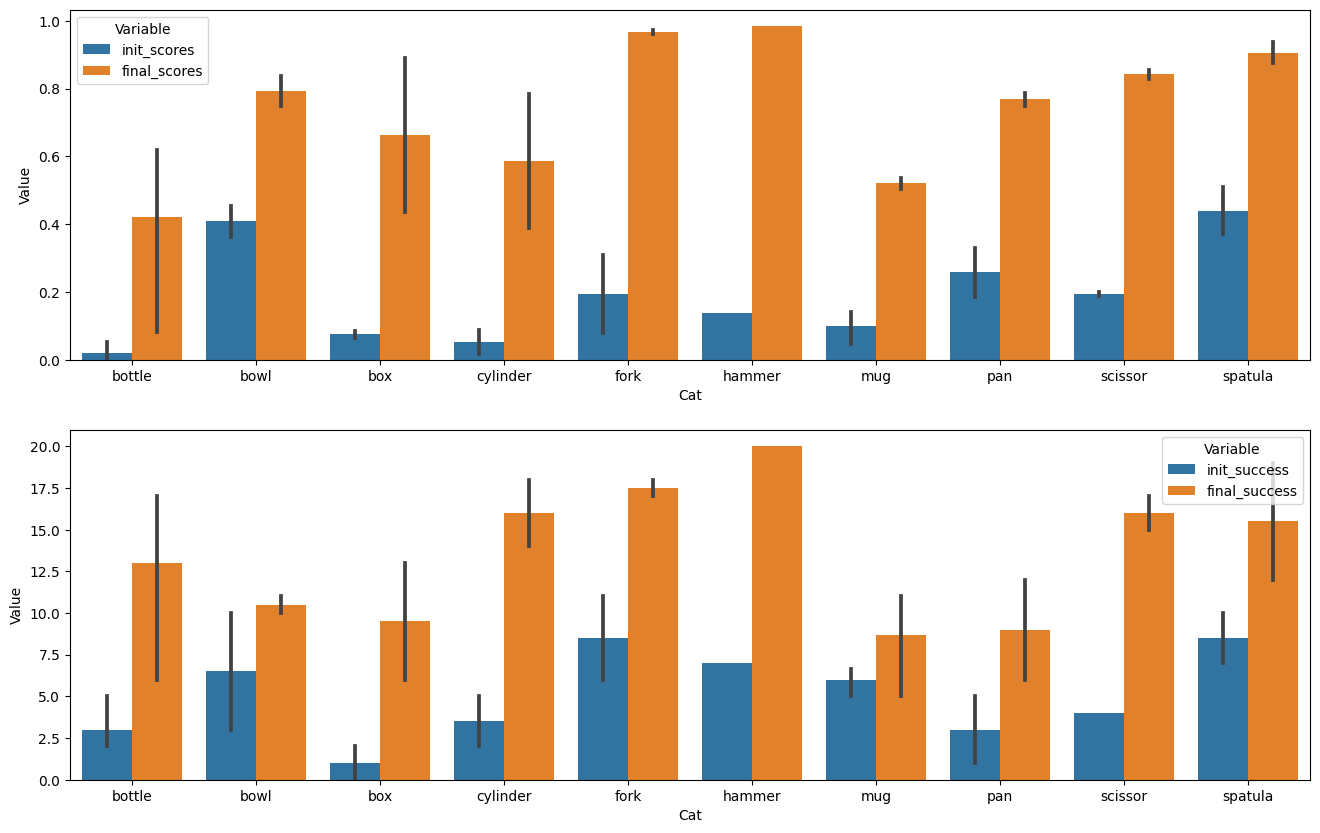

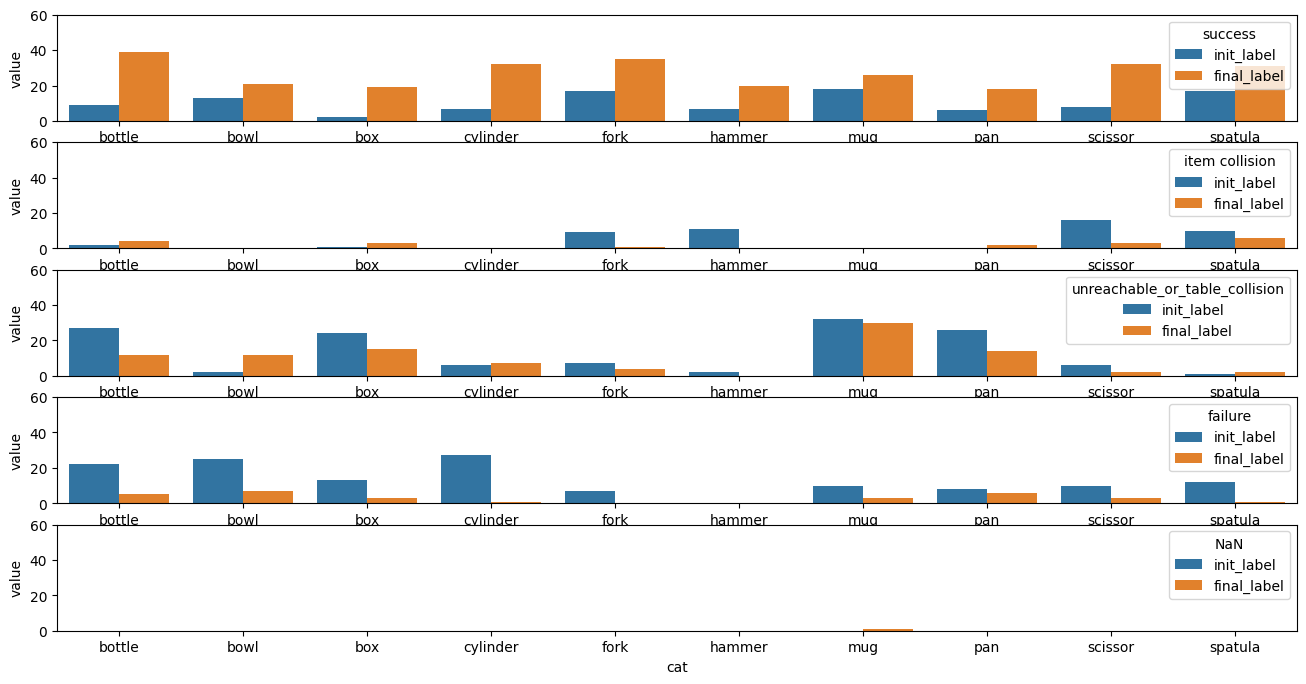

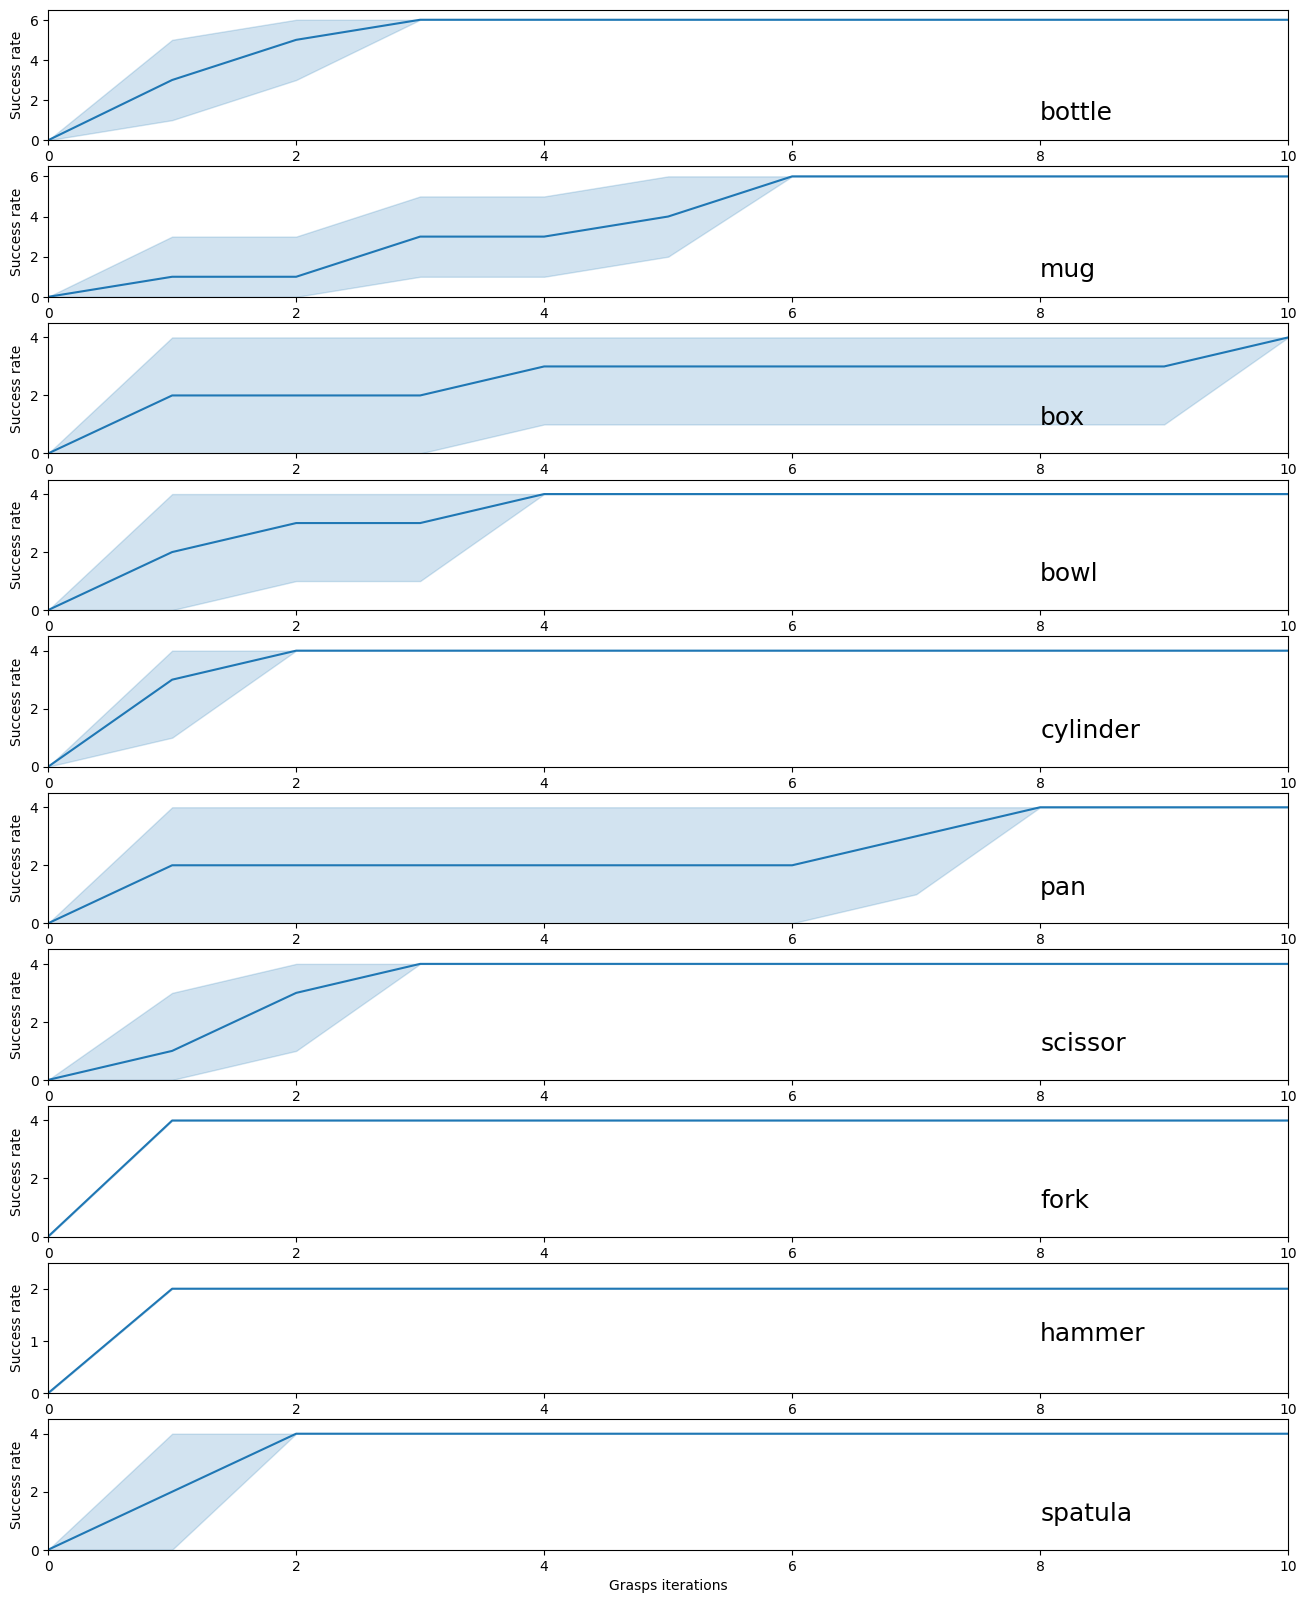

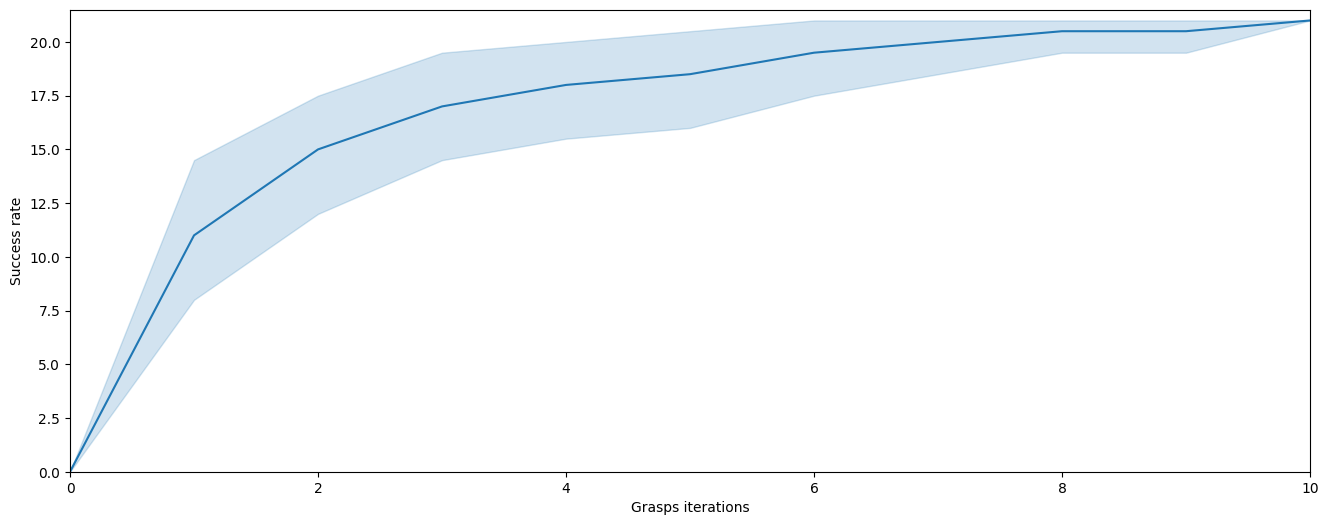

(420,) (420,)


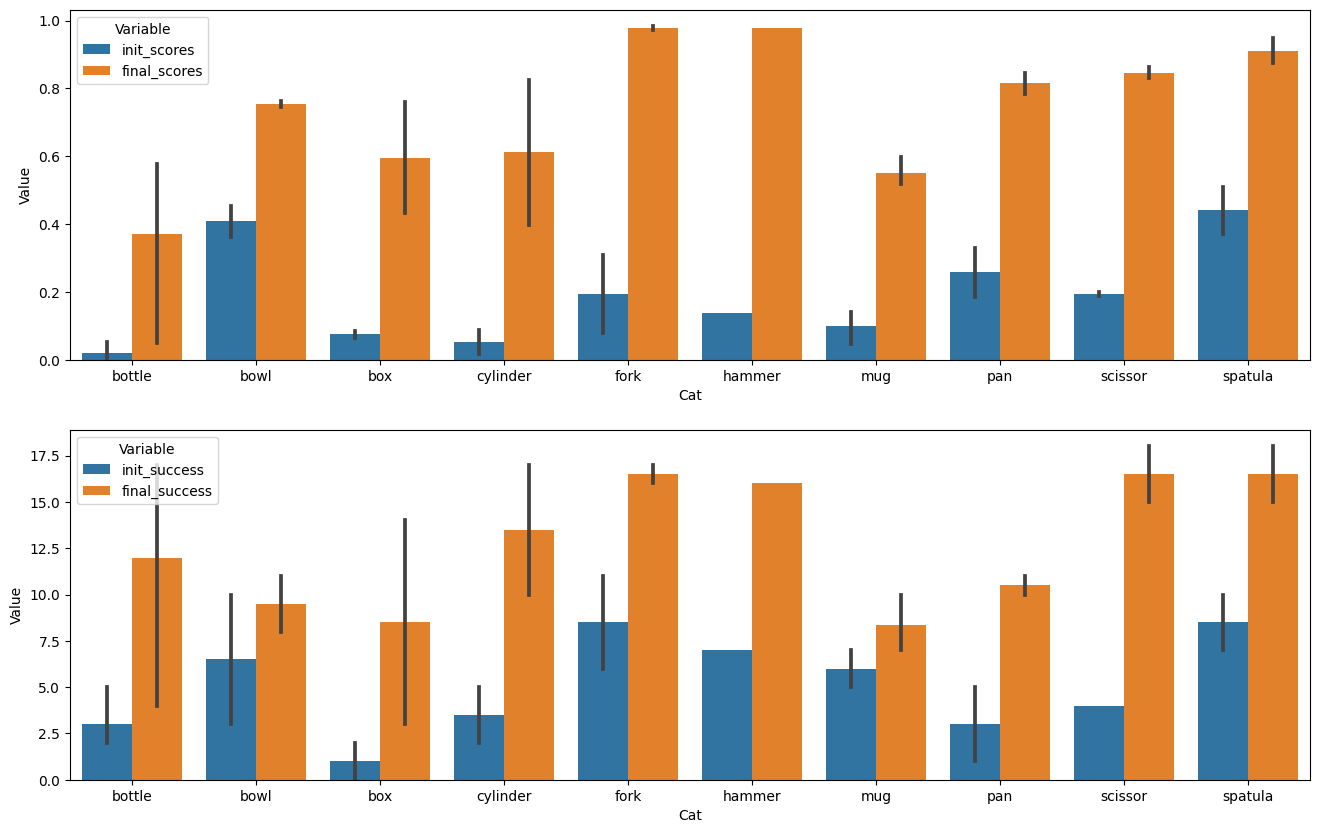

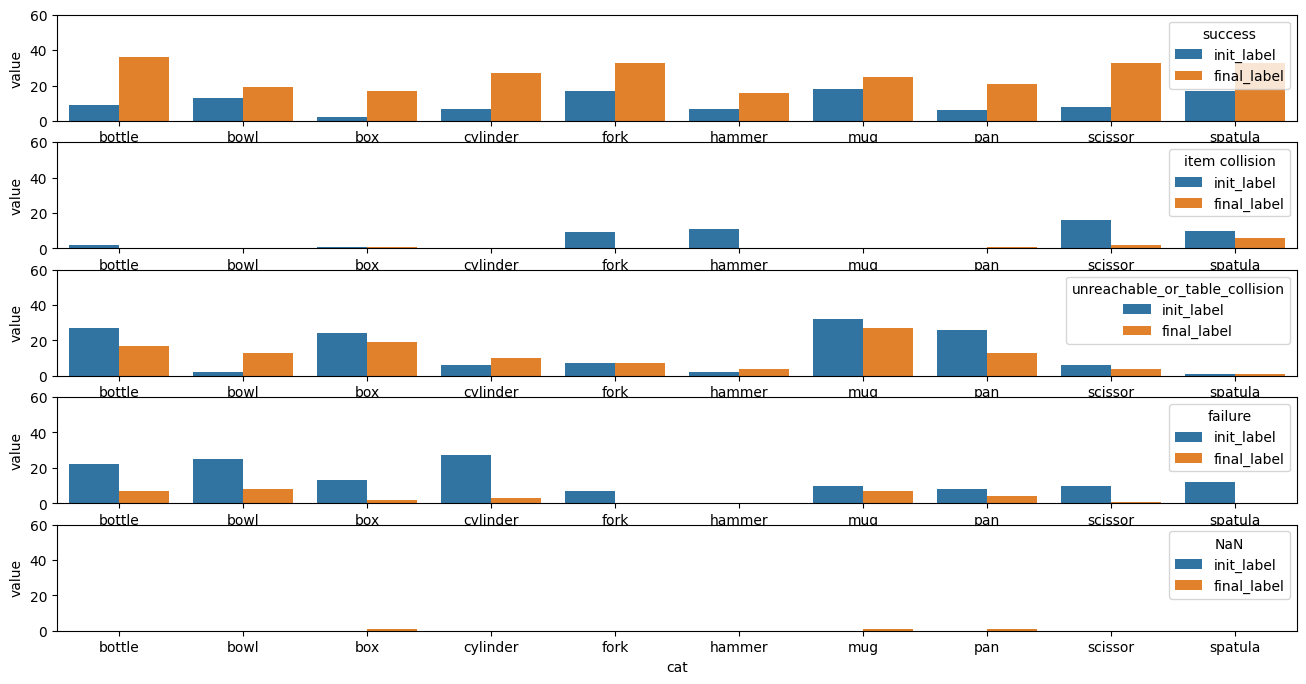

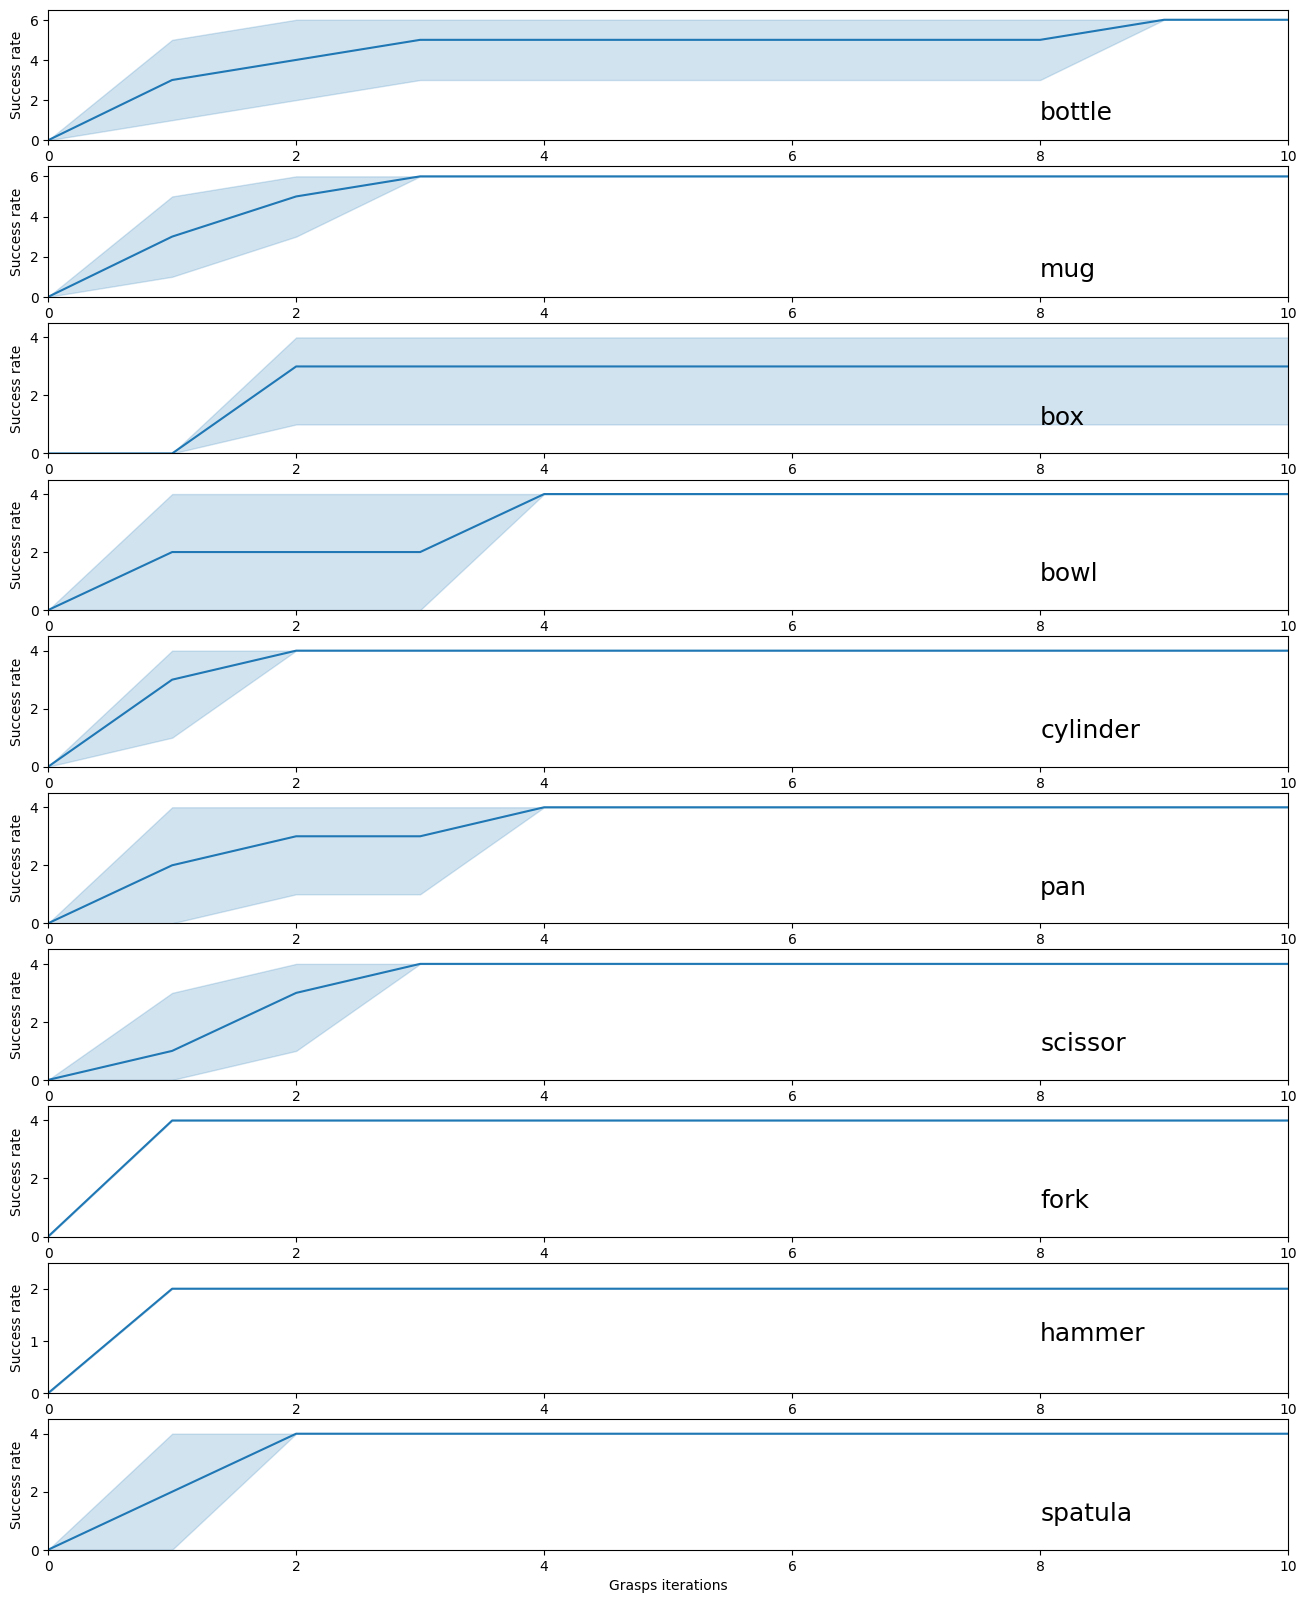

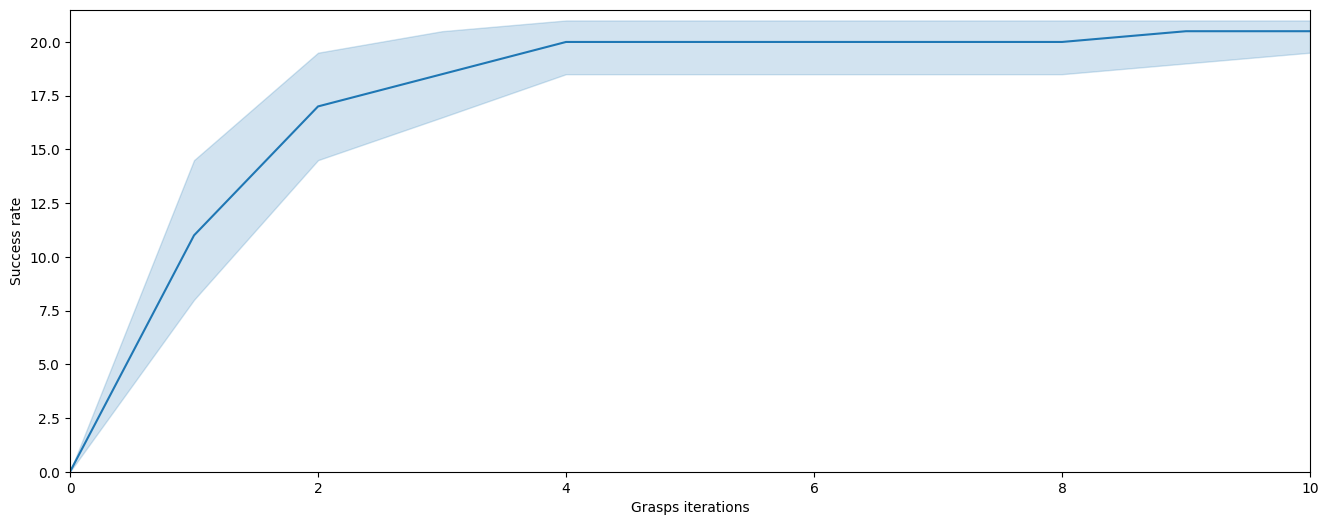

(420,) (420,)


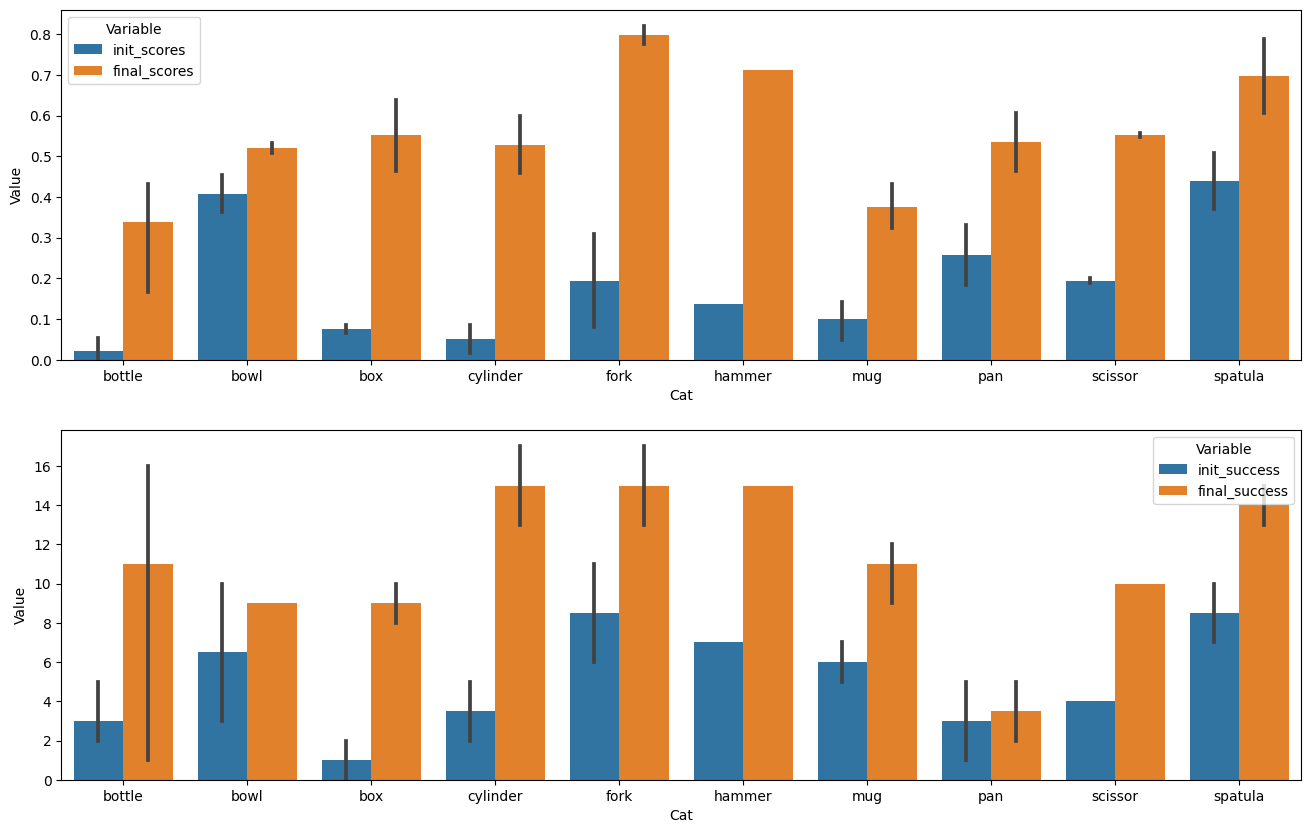

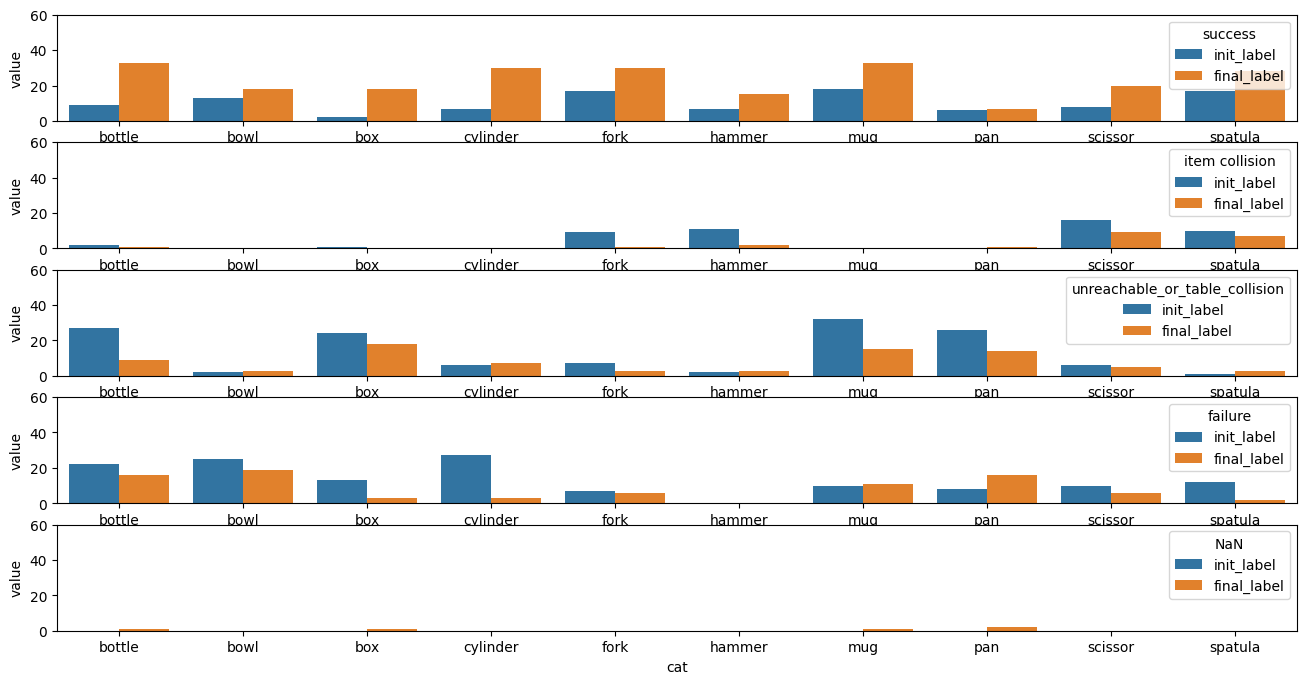

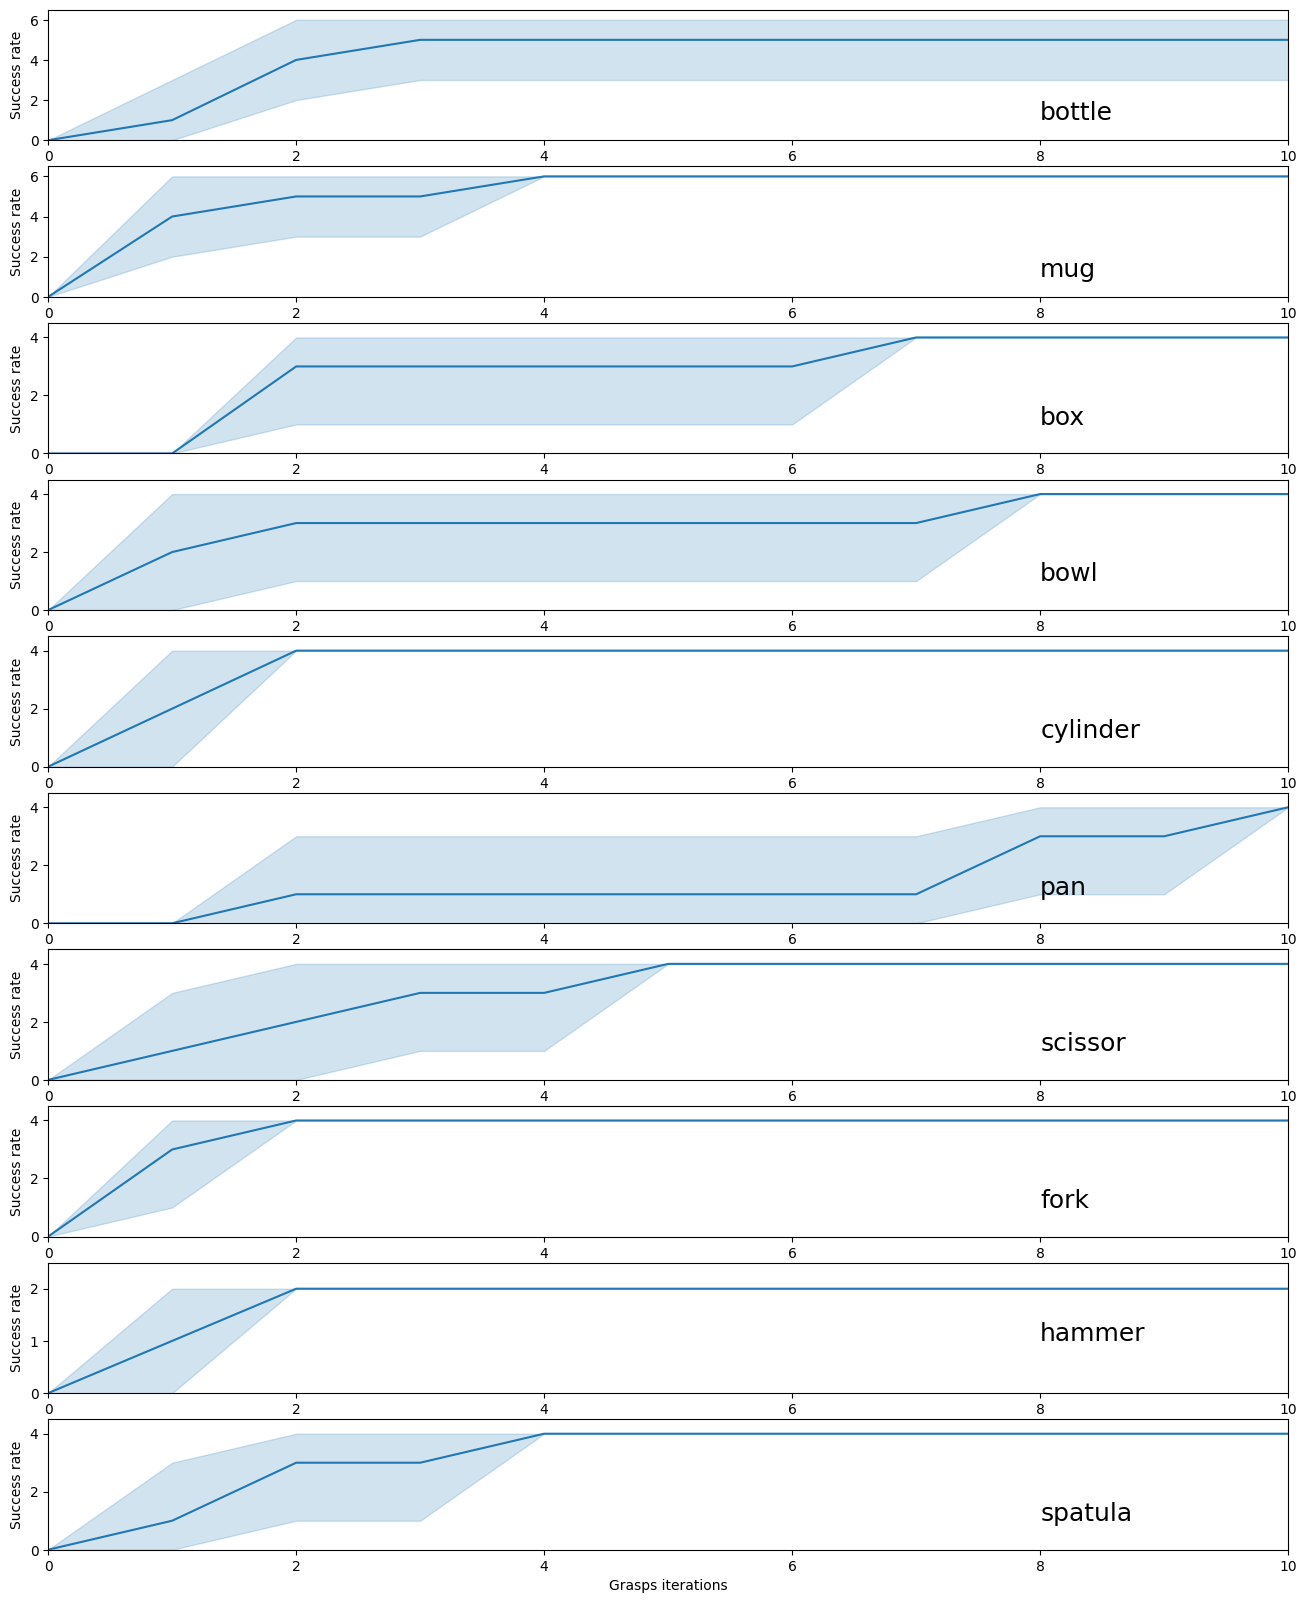

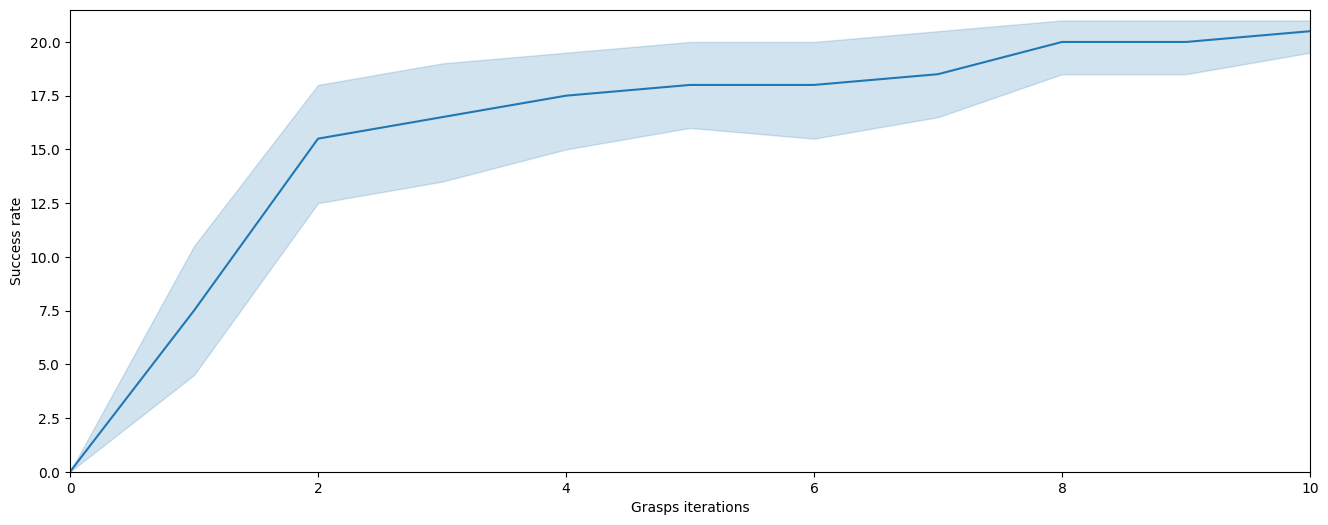

In [3]:
# prefix = f"{sampler}_SE_GraspFlow_Theta"

dfs = []
for prefix, sampler in zip(prefixes, samplers):

    df, num_grasps, num_envs = construct_experiment_df(experiment, sampler, prefix, experiments_dir, full_exeriment=full)
    summary(save_dir=save_dir, df=df, prefix=prefix, full_exeriment=full)
    summary_labels(save_dir=save_dir, df=df, prefix=prefix, full_exeriment=full)
    summary_cumulative_plot(save_dir=save_dir,
                        prefix=prefix,
                       df=df,
                       num_unique_objects=num_unique_objects,
                       full_experiment=full)
    
    df = df.assign(prefix=prefix)
    df = df.assign(sampler=sampler)
    dfs.append(df)

In [4]:
df = pd.concat(dfs)

In [5]:
df_summary = df[['prefix','exec_times', 'sample_times']]

In [6]:
df_summary = df.groupby(['prefix']).agg({'exec_times': [np.mean], 'sample_times': [np.mean], 
                           'init_success': [np.sum], 'final_success': [np.sum],
                                        'init_scores': [np.mean], 'final_scores': [np.mean]})

In [7]:
if full:
    writer = pd.ExcelWriter(f'{save_dir}/full_results.xlsx', engine = 'openpyxl')
else:
    writer = pd.ExcelWriter(f'{save_dir}/results.xlsx', engine = 'openpyxl')
df.to_excel(writer, sheet_name = 'All')
df_summary.to_excel(writer, sheet_name = 'Summary')
writer.close()